# 응용통계학_2
> midterm

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Applied Statistics]

---

In [1]:
#hide
options(jupyter.plot_scale=4)
options(repr.plot.width=8,repr.plot.height=6,repr.plot.res=300)
#options(jupyter.rich_display=FALSE)
#options(max.print=1000)

https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table


위에서 데이터를 하나 선정하여 

1. 문제를 세팅 (반응변수 및 설명변수 등)

2. 모형 적합 

3. 모형 해석 및 추론

4. 모형 진단

5. 각 회귀계수에 대한 95% 신뢰구간을 Bootstrap에 근거하여 구성하고 이를 이론적인 결과에 의해 산출되는 신뢰구간과 비교한 후 비슷하게 도출되는지 확인할 것. 비슷하다면 왜인지, 차이가 있다면 어떤 이유로 판단되는지 등을 기술,

 

- 데이터는 꼭 위 링크에서 선정하지 않고 다른 데이터를 사용하여도 무방함

- R 뿐 아니라 다른 tool을 이용하여도 무방함.

- 분석과정 및 결과/해석 등을 문서로 정리하여 제출 (소스코드 포함) 

---

사용한 데이터

https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

*Data Set Information:*

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. The â€œreal estate valuationâ€ is a regression problem. The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples).


*Attribute Information:*

The inputs are as follows
- **X1**=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **X2**=the house age (unit: year)
- **X3**=the distance to the nearest MRT station (unit: meter)
- **X4**=the number of convenience stores in the living circle on foot (integer)
- **X5**=the geographic coordinate, latitude. (unit: degree)
- **X6**=the geographic coordinate, longitude. (unit: degree)

*The output is as follow*

**Y**= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)


*Relevant Papers:*

Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.


*Citation Request:*

Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.

## 1. 문제 세팅

In [2]:
library(readxl)

In [3]:
df = read_excel('Real estate valuation data set.xlsx',range='B1:H415')

In [4]:
head(df)

X1 transaction date X2 house age X3 distance to the nearest MRT station
1 2012.917            32.0           84.87882                            
2 2012.917            19.5          306.59470                            
3 2013.583            13.3          561.98450                            
4 2013.500            13.3          561.98450                            
5 2012.833             5.0          390.56840                            
6 2012.667             7.1         2175.03000                            
  X4 number of convenience stores X5 latitude X6 longitude
1 10                              24.98298    121.5402    
2  9                              24.98034    121.5395    
3  5                              24.98746    121.5439    
4  5                              24.98746    121.5439    
5  5                              24.97937    121.5425    
6  3                              24.96305    121.5125    
  Y house price of unit area
1 37.9                      
2 42.2                      
3 47.3                      
4 54.8                      
5 43.1                      
6 32.1

In [5]:
colnames(df)

[1] "X1 transaction date"                   
[2] "X2 house age"                          
[3] "X3 distance to the nearest MRT station"
[4] "X4 number of convenience stores"       
[5] "X5 latitude"                           
[6] "X6 longitude"                          
[7] "Y house price of unit area"

변수명을 설정해주었다.

In [6]:
colnames(df) <- c('X1','X2','X3','X4','X5','X6','Y')

결측값은 없었다.

In [7]:
colSums(is.na(df)) 

X1 X2 X3 X4 X5 X6  Y 
 0  0  0  0  0  0  0

In [8]:
summary(df)

       X1             X2               X3                X4        
 Min.   :2013   Min.   : 0.000   Min.   :  23.38   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 9.025   1st Qu.: 289.32   1st Qu.: 1.000  
 Median :2013   Median :16.100   Median : 492.23   Median : 4.000  
 Mean   :2013   Mean   :17.713   Mean   :1083.89   Mean   : 4.094  
 3rd Qu.:2013   3rd Qu.:28.150   3rd Qu.:1454.28   3rd Qu.: 6.000  
 Max.   :2014   Max.   :43.800   Max.   :6488.02   Max.   :10.000  
       X5              X6              Y         
 Min.   :24.93   Min.   :121.5   Min.   :  7.60  
 1st Qu.:24.96   1st Qu.:121.5   1st Qu.: 27.70  
 Median :24.97   Median :121.5   Median : 38.45  
 Mean   :24.97   Mean   :121.5   Mean   : 37.98  
 3rd Qu.:24.98   3rd Qu.:121.5   3rd Qu.: 46.60  
 Max.   :25.01   Max.   :121.6   Max.   :117.50  

In [9]:
library(ggplot2)

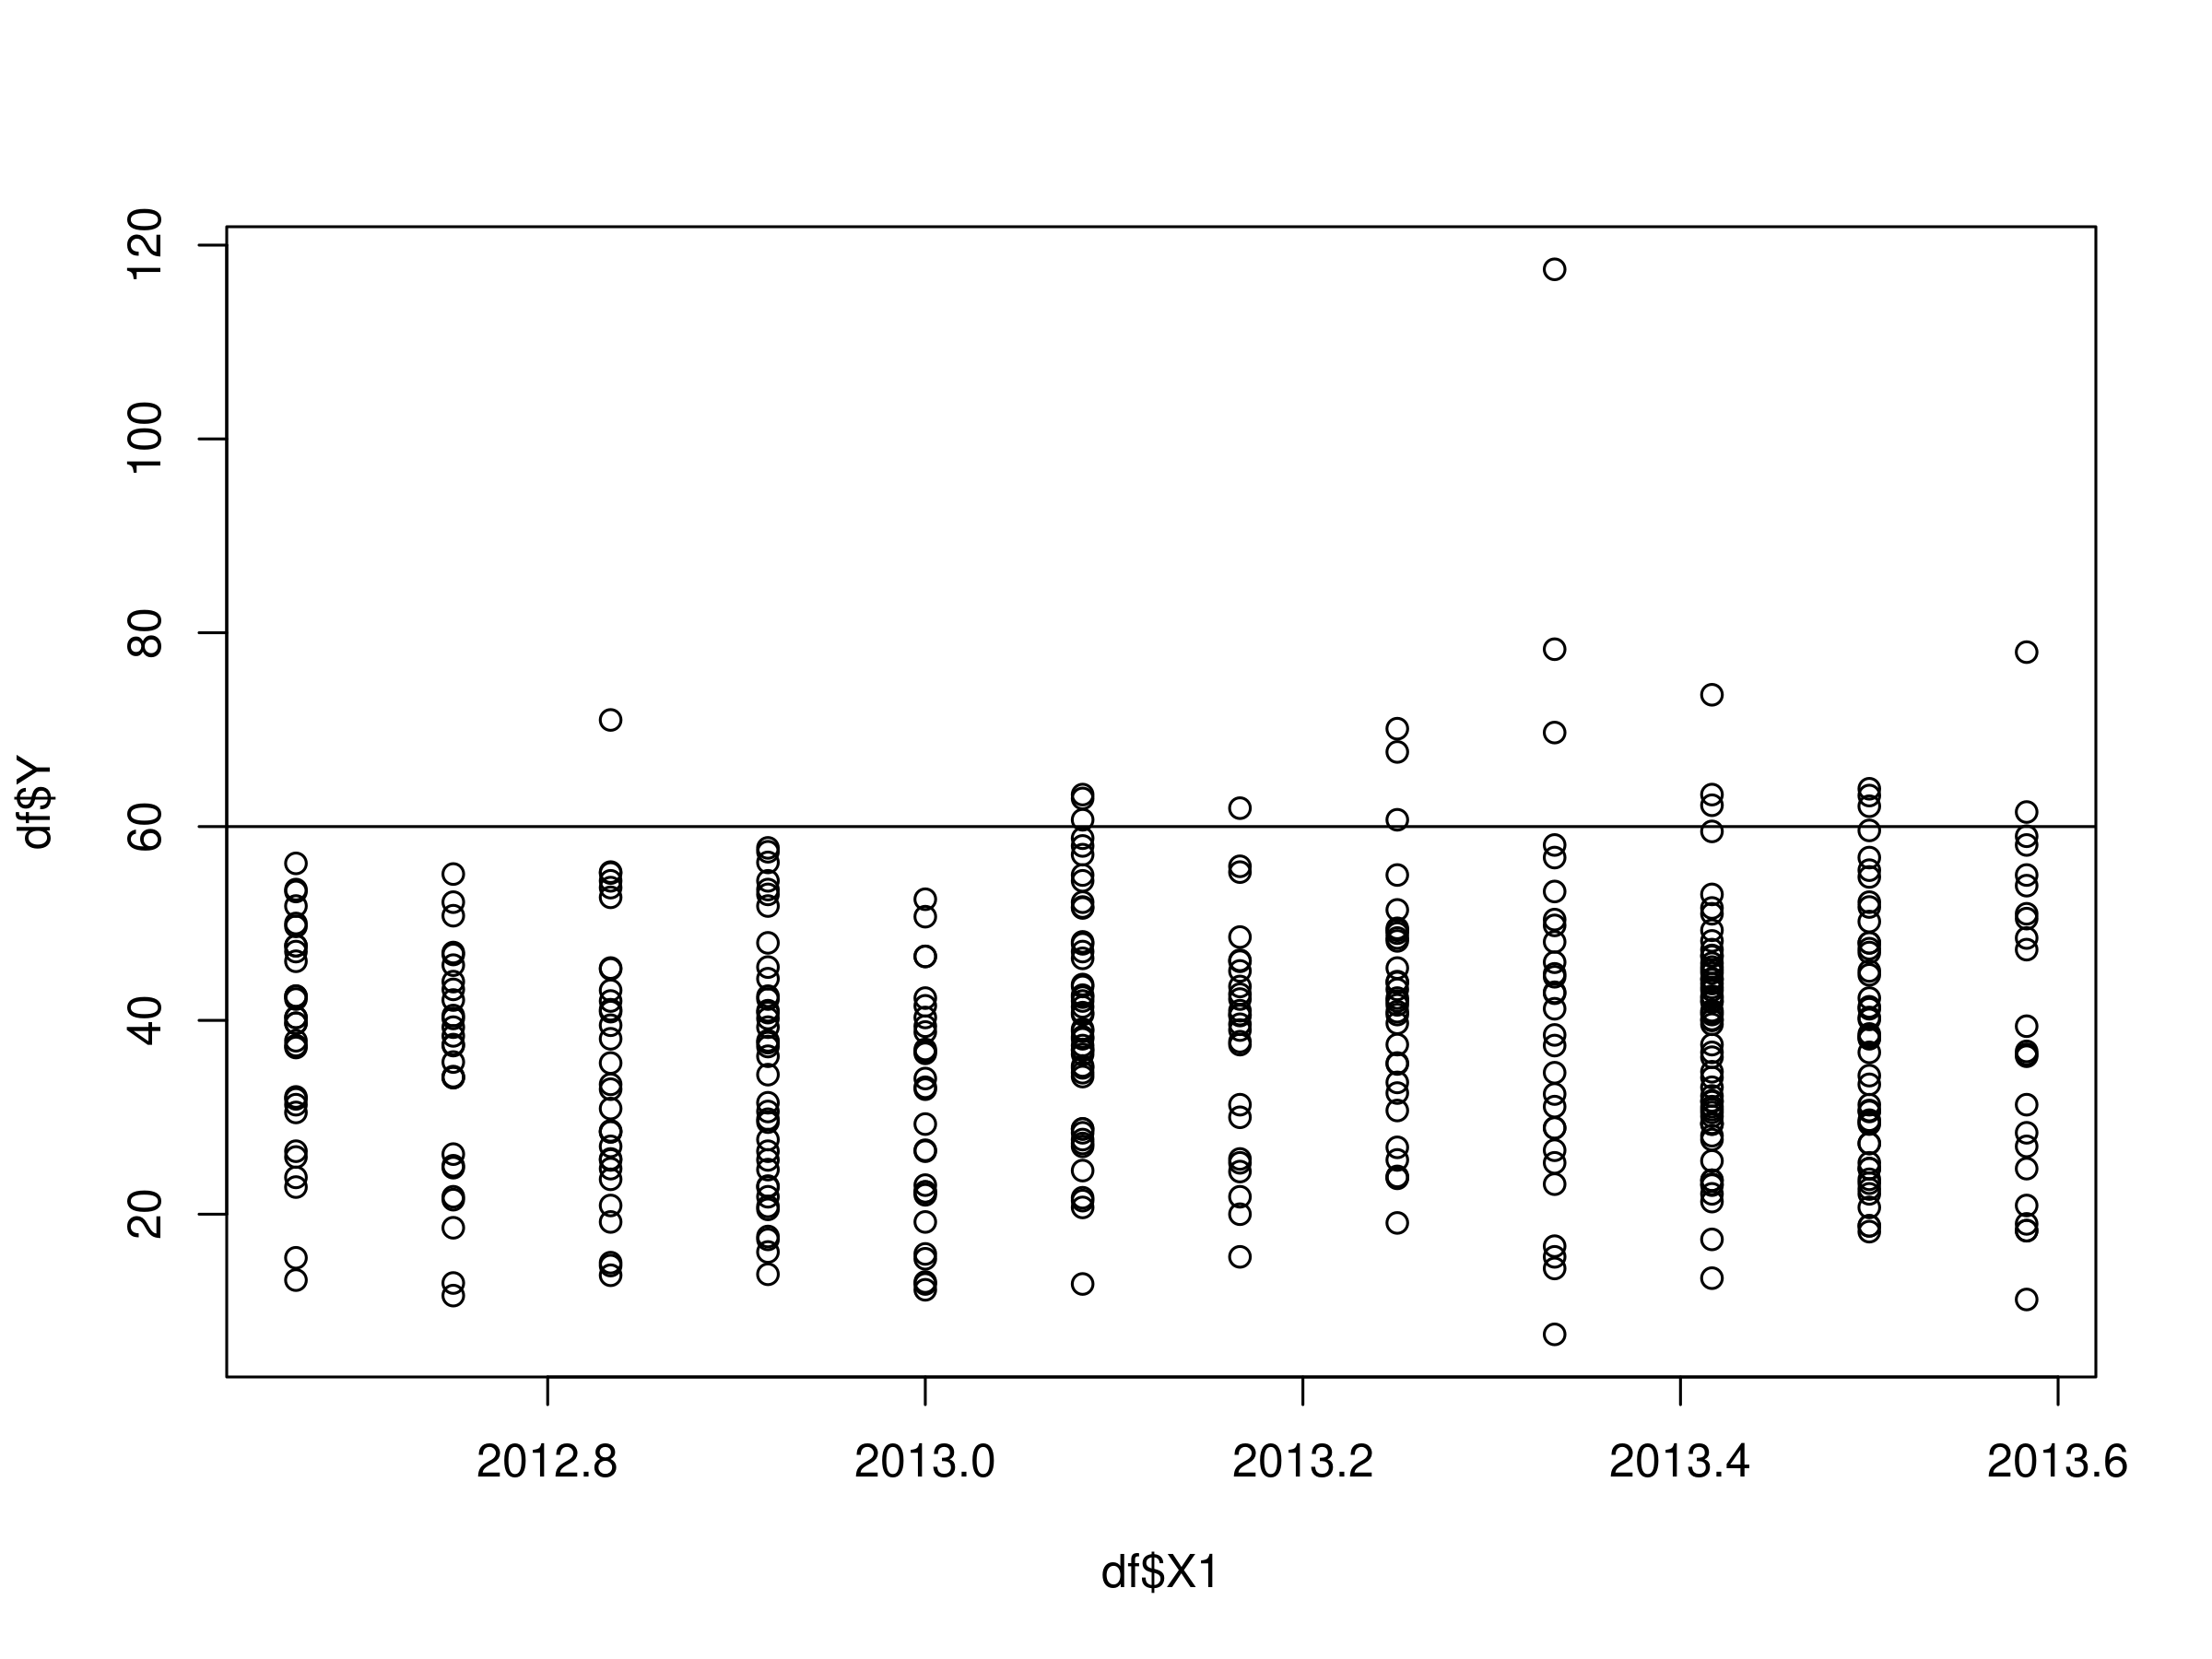

In [10]:
plot(df$X1,df$Y)
abline(h=60)

1번 그림(날짜 데이터)
- 2013년 초까지는 한 개의 이상치를 제외하고 모두 60이하 였다.
- 그 후 집값이 완만한 경사로 증가하는 trend를 가진다고 말할 수 있을 것 같다.

`geom_smooth()` using formula 'y ~ x'



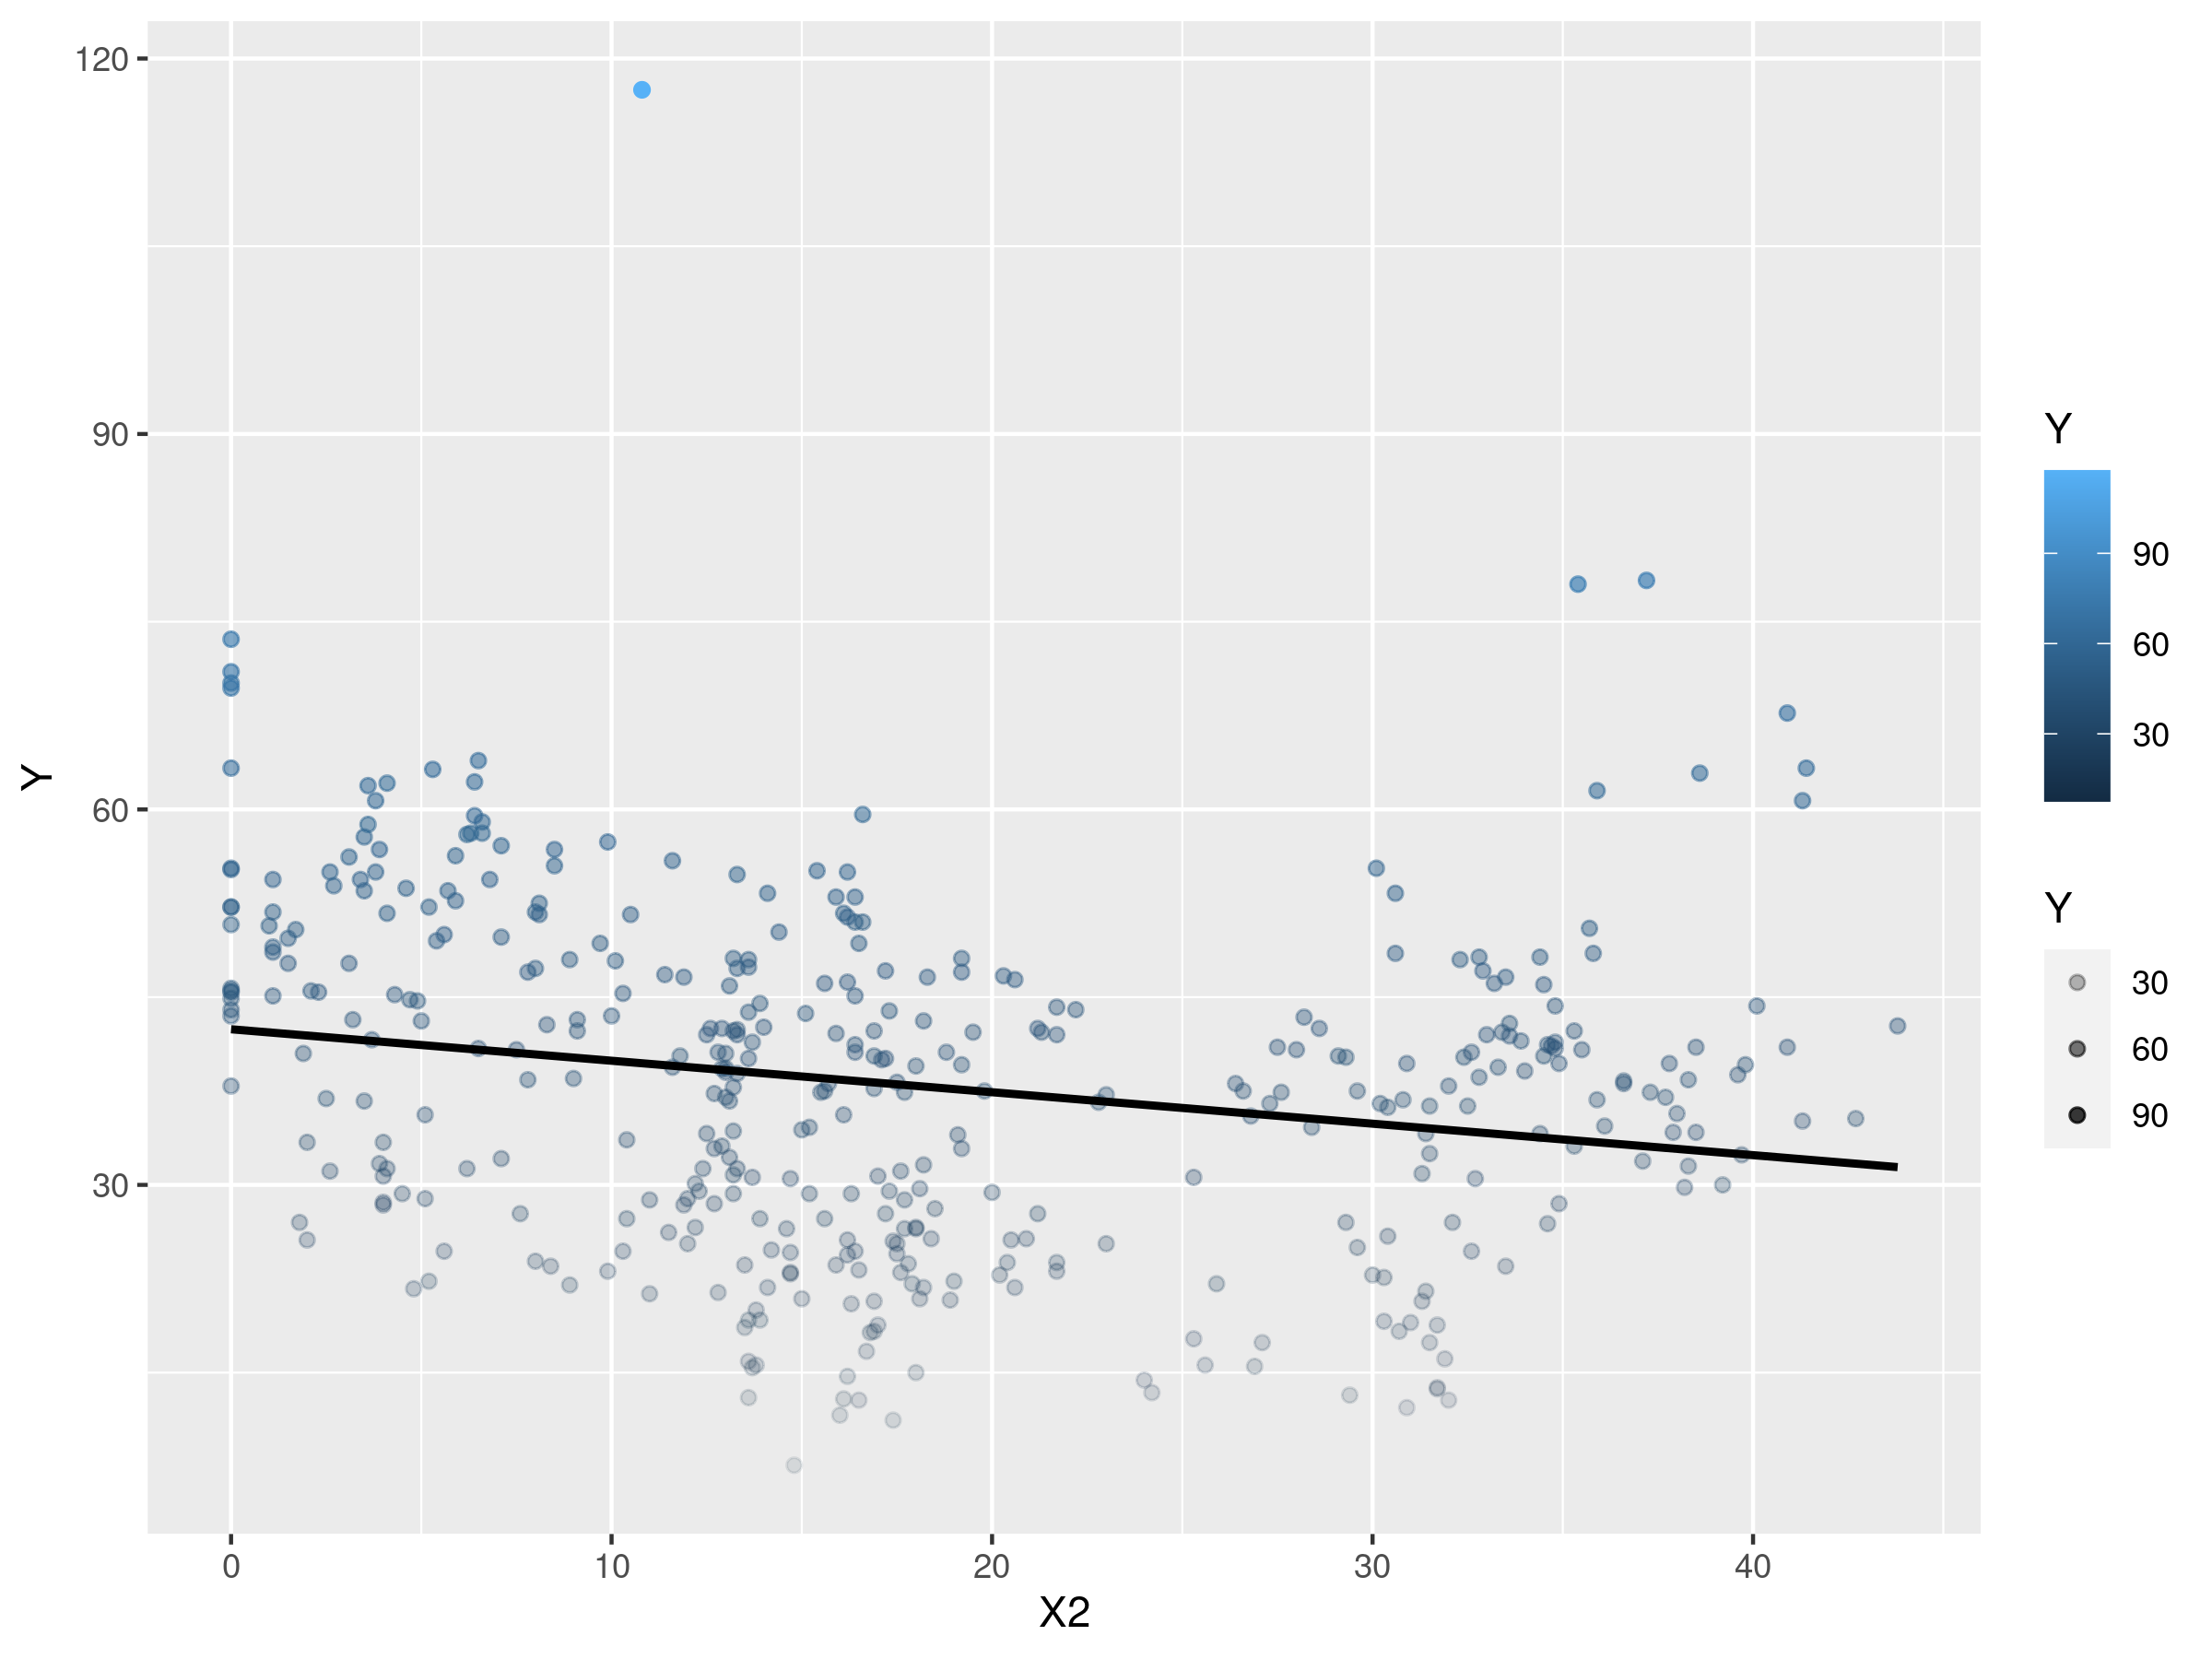

In [11]:
ggplot(df, aes(X2,Y))+geom_point(aes(color = Y,alpha=Y))+geom_smooth(method=lm, se=FALSE, col='black', size=1)

2번 그림(house age)
- house age가 높아질수록 house price가 완만하게 낮아지는 trend가 보인다.
- house age가 높아질수록 house price가 낮아지는 경향이 있지만 house age가 높은 구간에서 유독 house price가 큰 이상치 비슷한 데이터가 보이기도 한다.

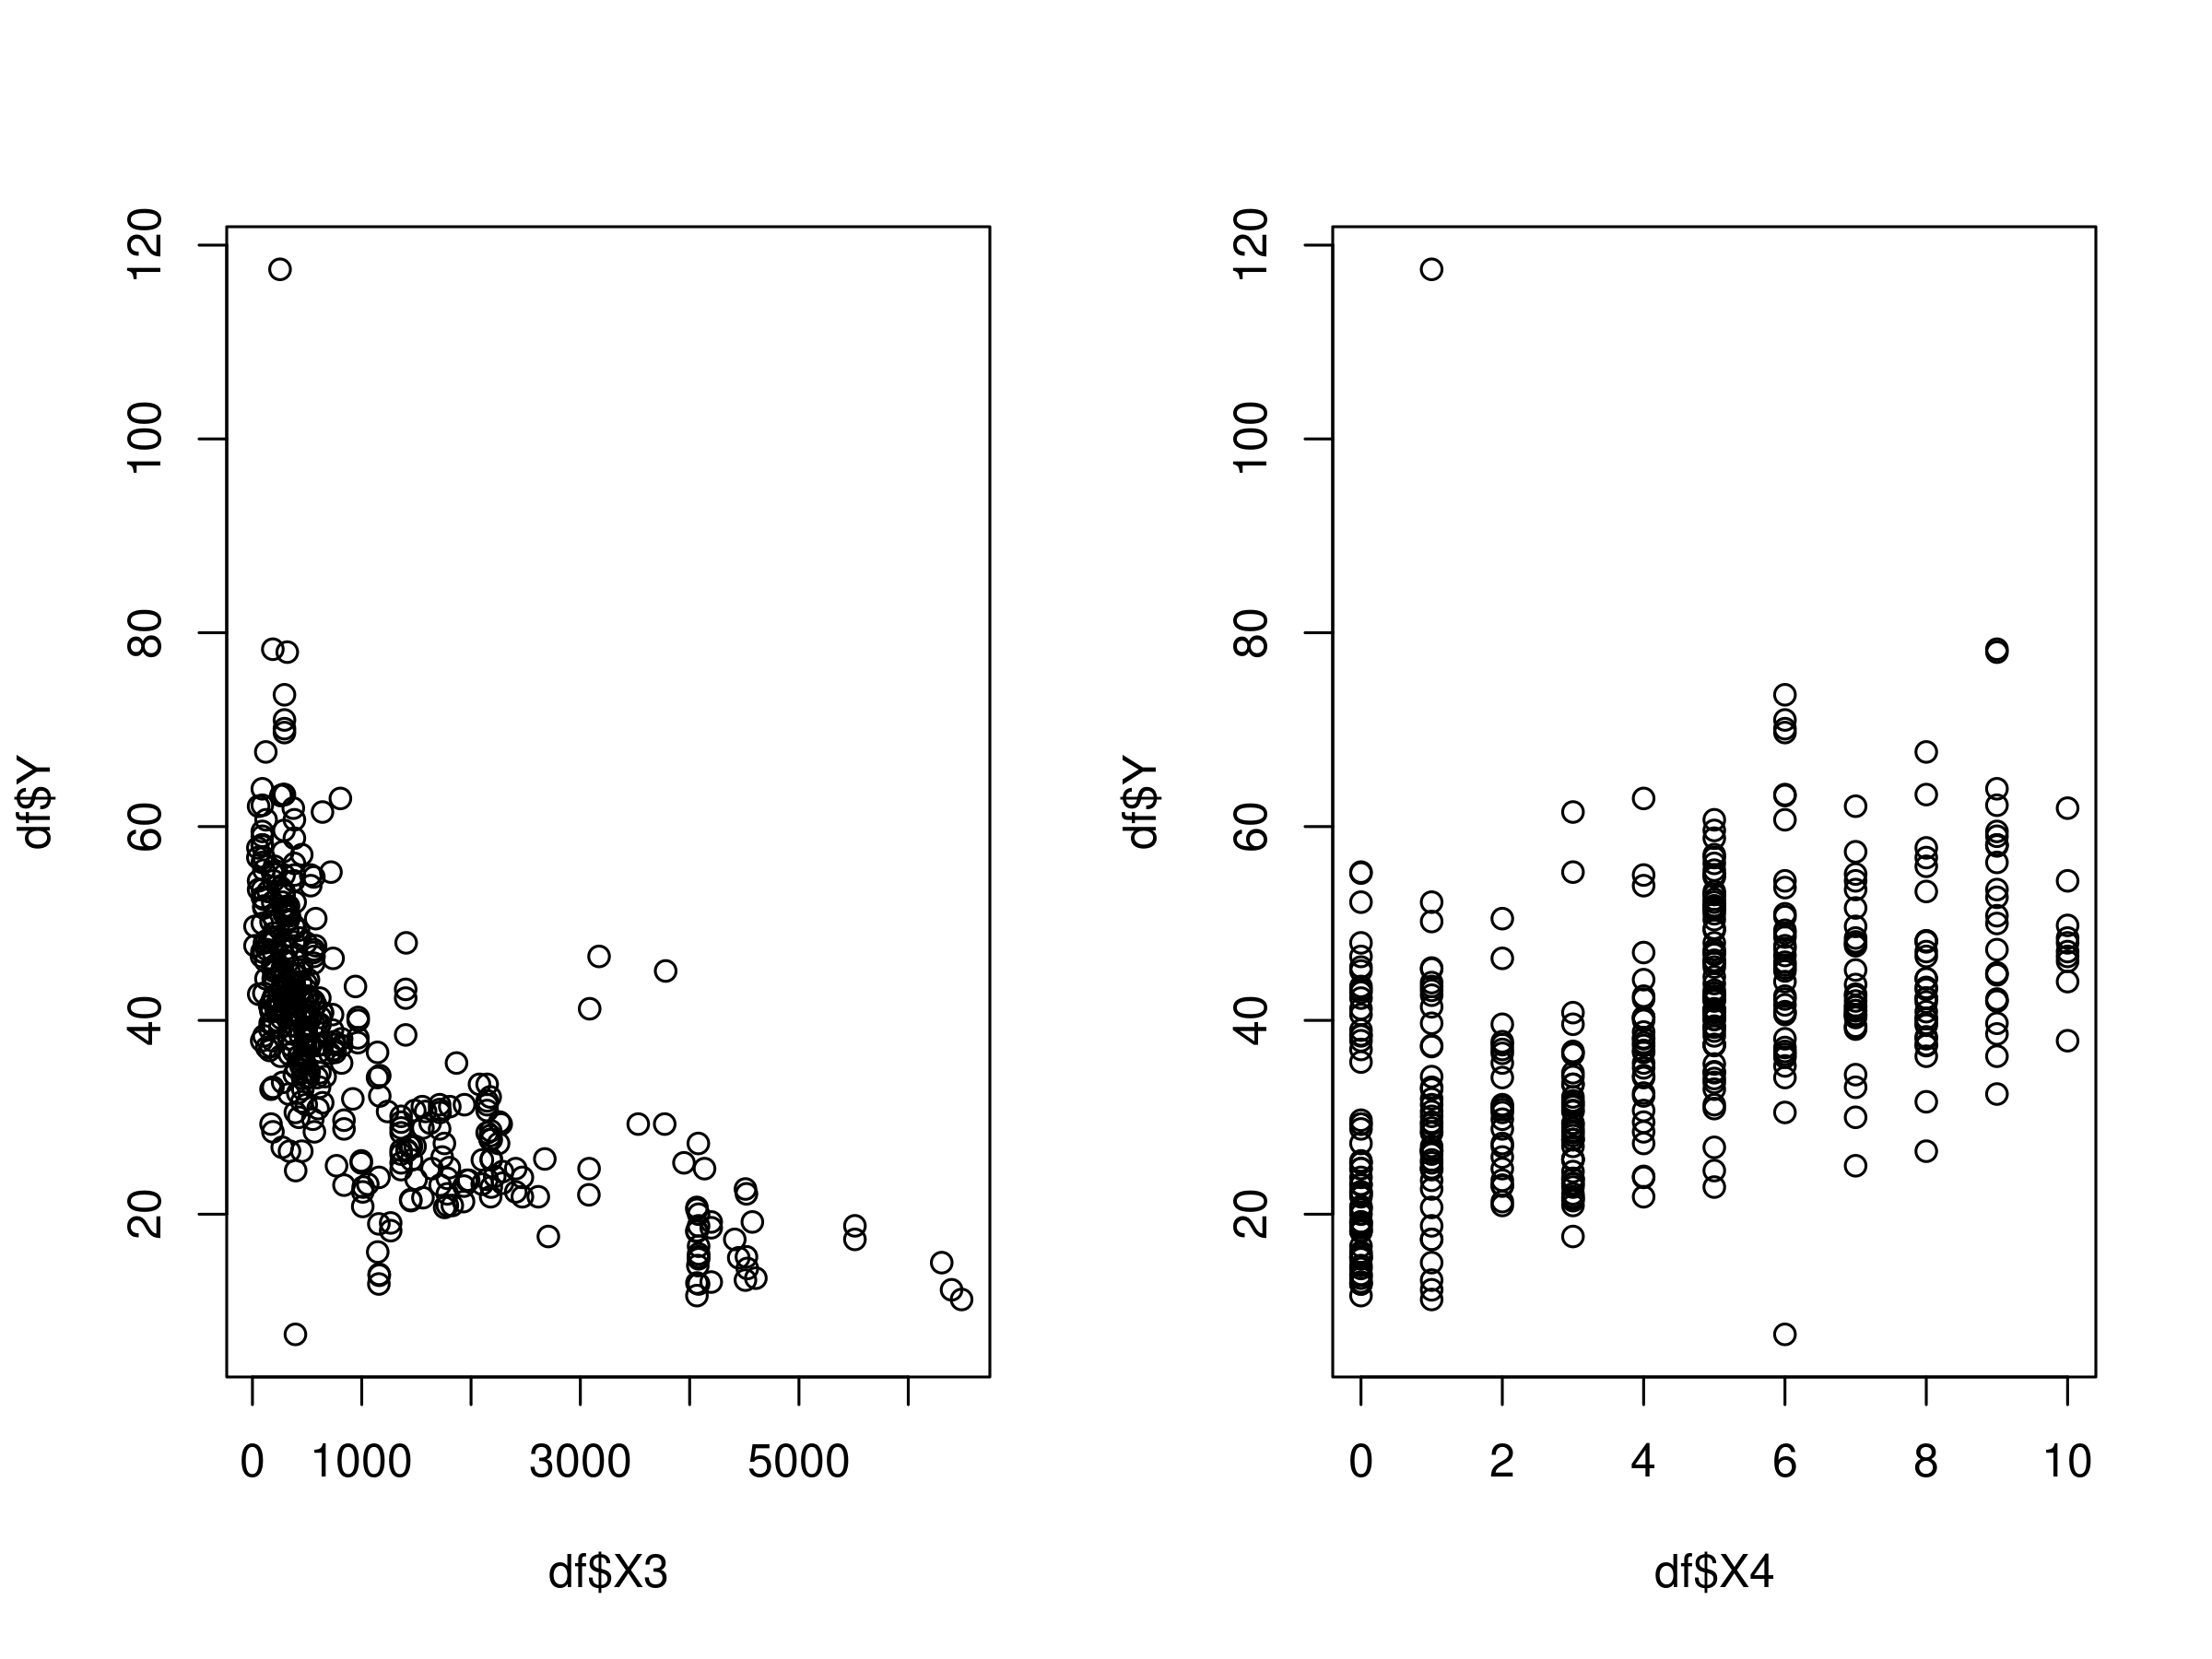

In [12]:
par(mfrow=c(1,2))
plot(df$X3,df$Y)
plot(df$X4,df$Y)

3번 그림(distance to the nearest MRT station)
- 높은 경사로 감소하는 추세가 보인다.
- 즉, 역과 멀어질 수록 집값이 떨어지고 있었고 추가로 데이터도 적었다.

4번 그림(number of convenience stores)
- trend가 증가하는 모양을 띄고 있었다.
- 편의시설 수가 증가함에 따라 house price도 증가하는 경향이 존재하는 것 같다.

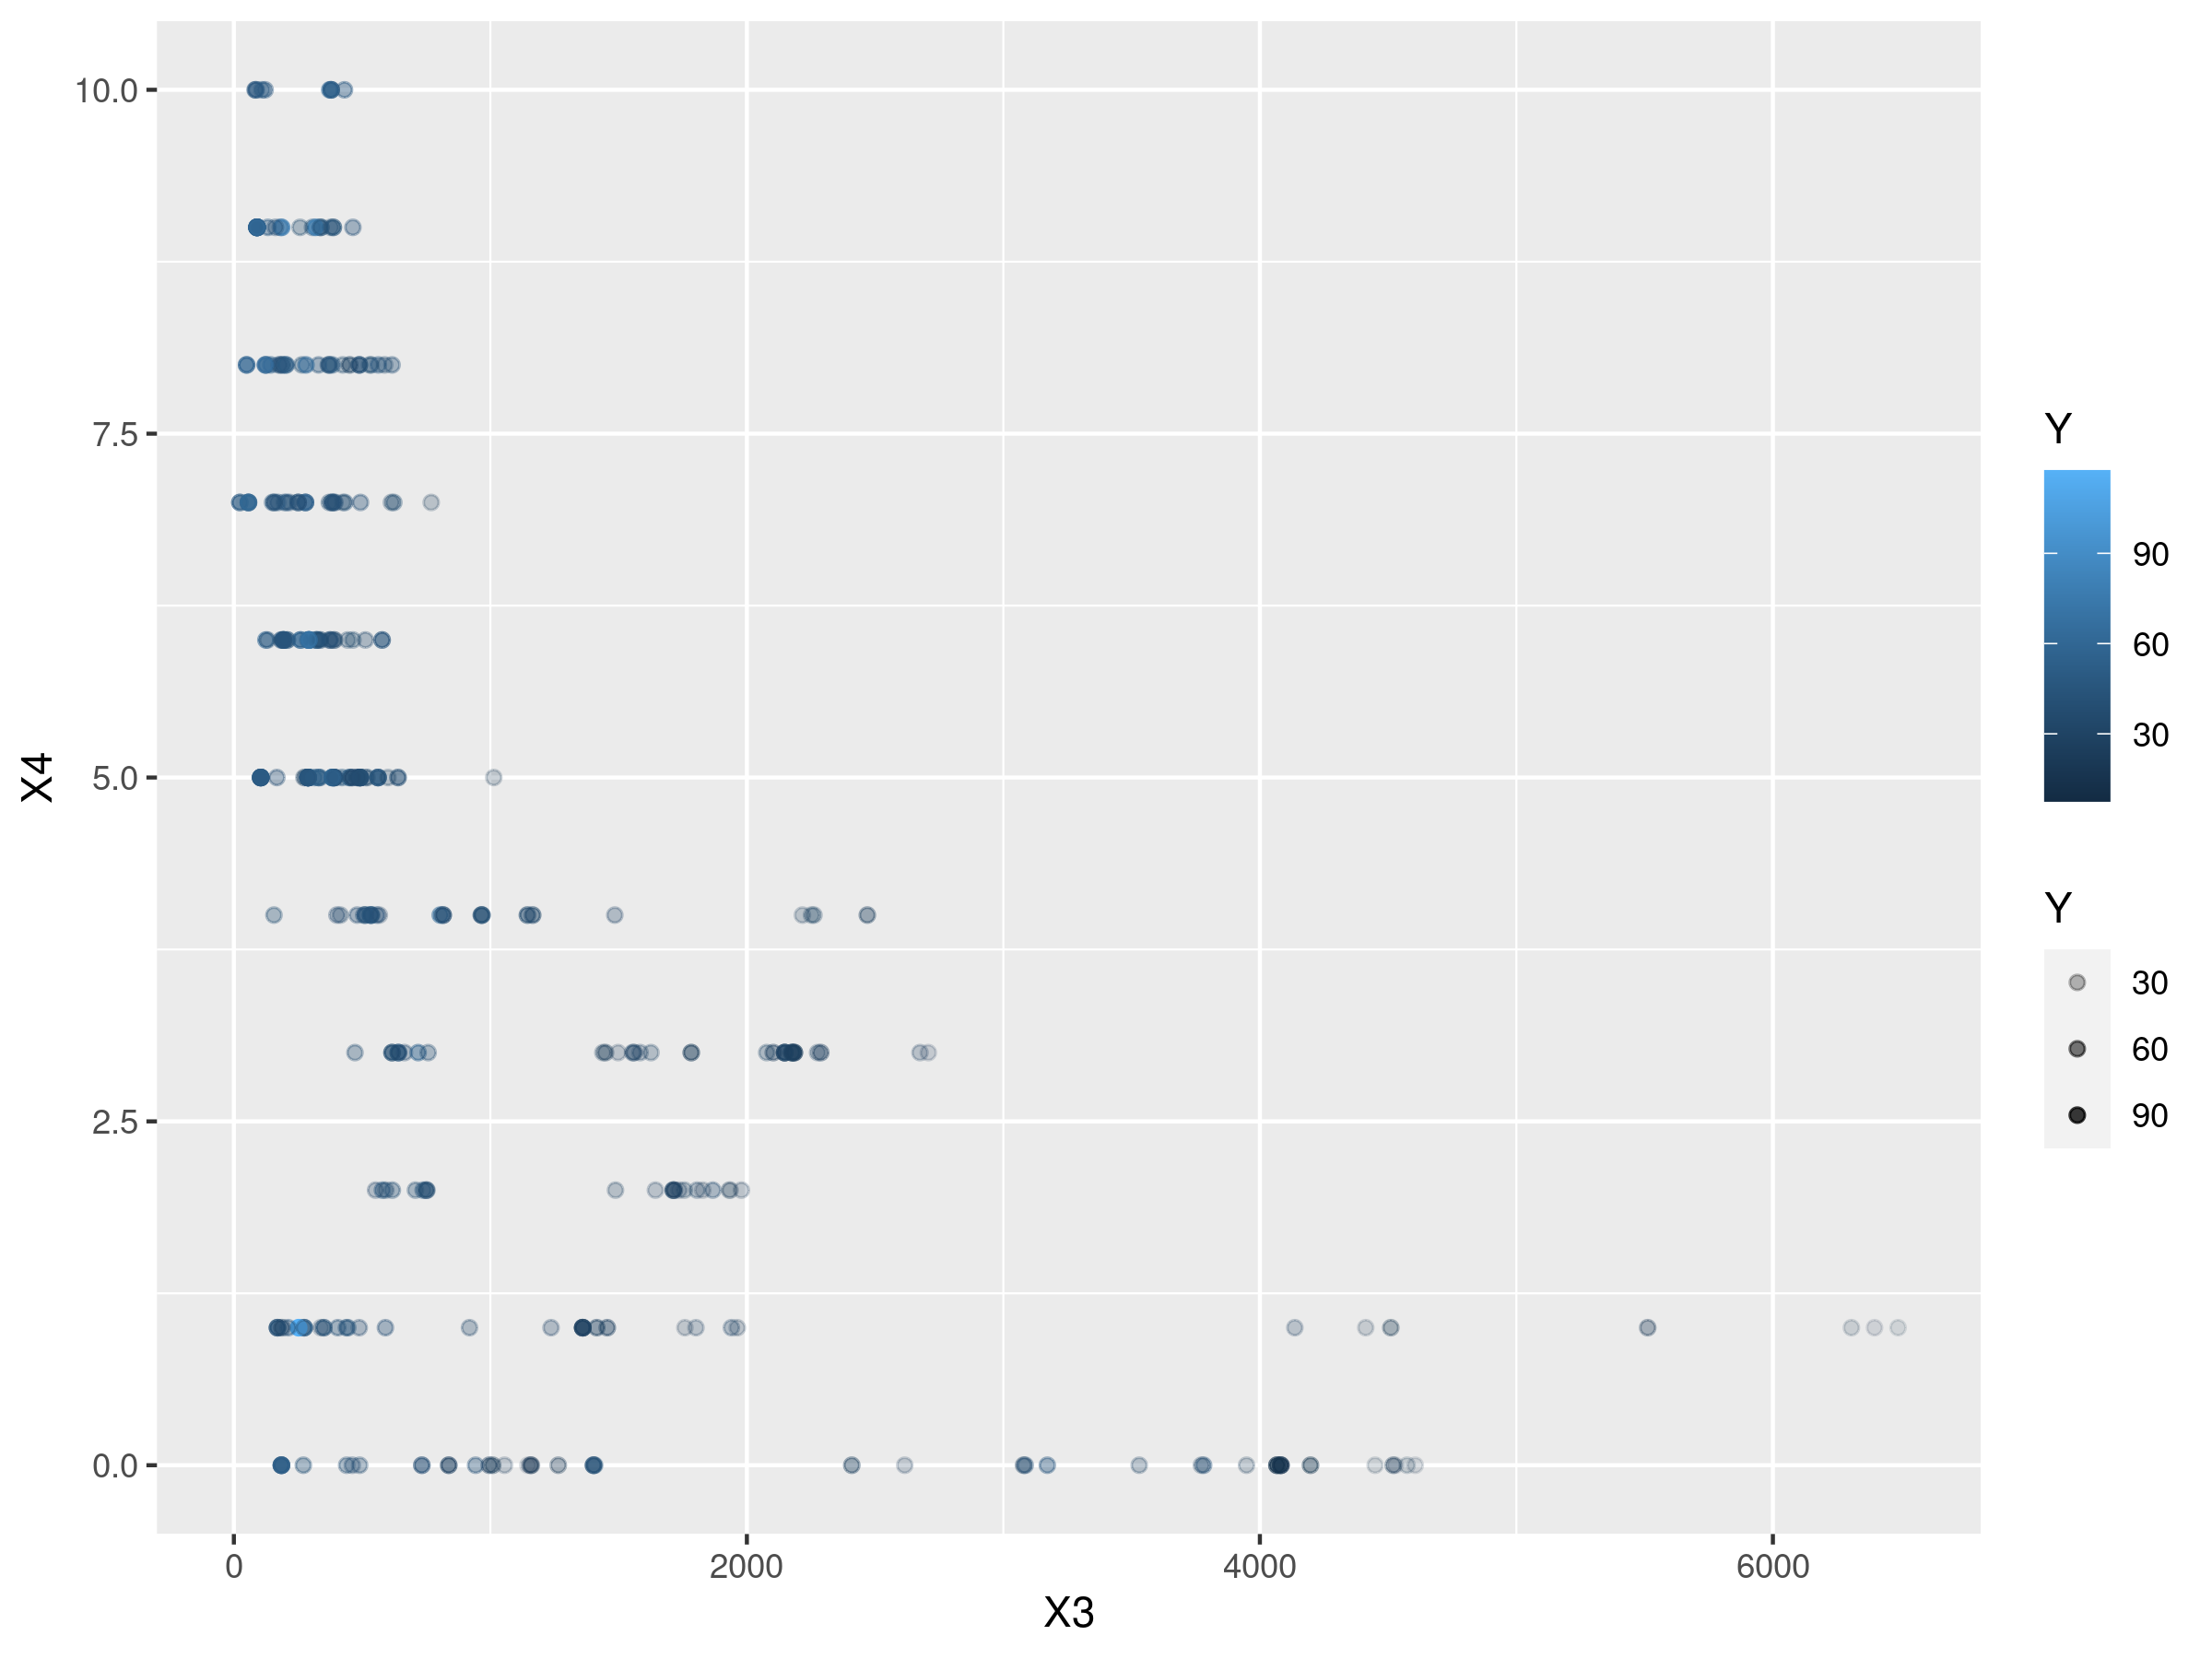

In [13]:
ggplot(df, aes(X3,X4, color = Y))+geom_point(aes(alpha=Y))

5번 그림(X축: distance to the nearest MRT station, Y축: number of convenience stores)
- 역이 가까울수록 편의시설 수가 많은 경향이 있었고, 멀리 있을때 편의시설 수가 적은 경향이 보인다.
- 그리고 투명도로 house price를 확인해보니 mrt station이 가깝고 편의시설이 5개 이상인 부분에 데이터가 몰려있어 보이기도 했다.

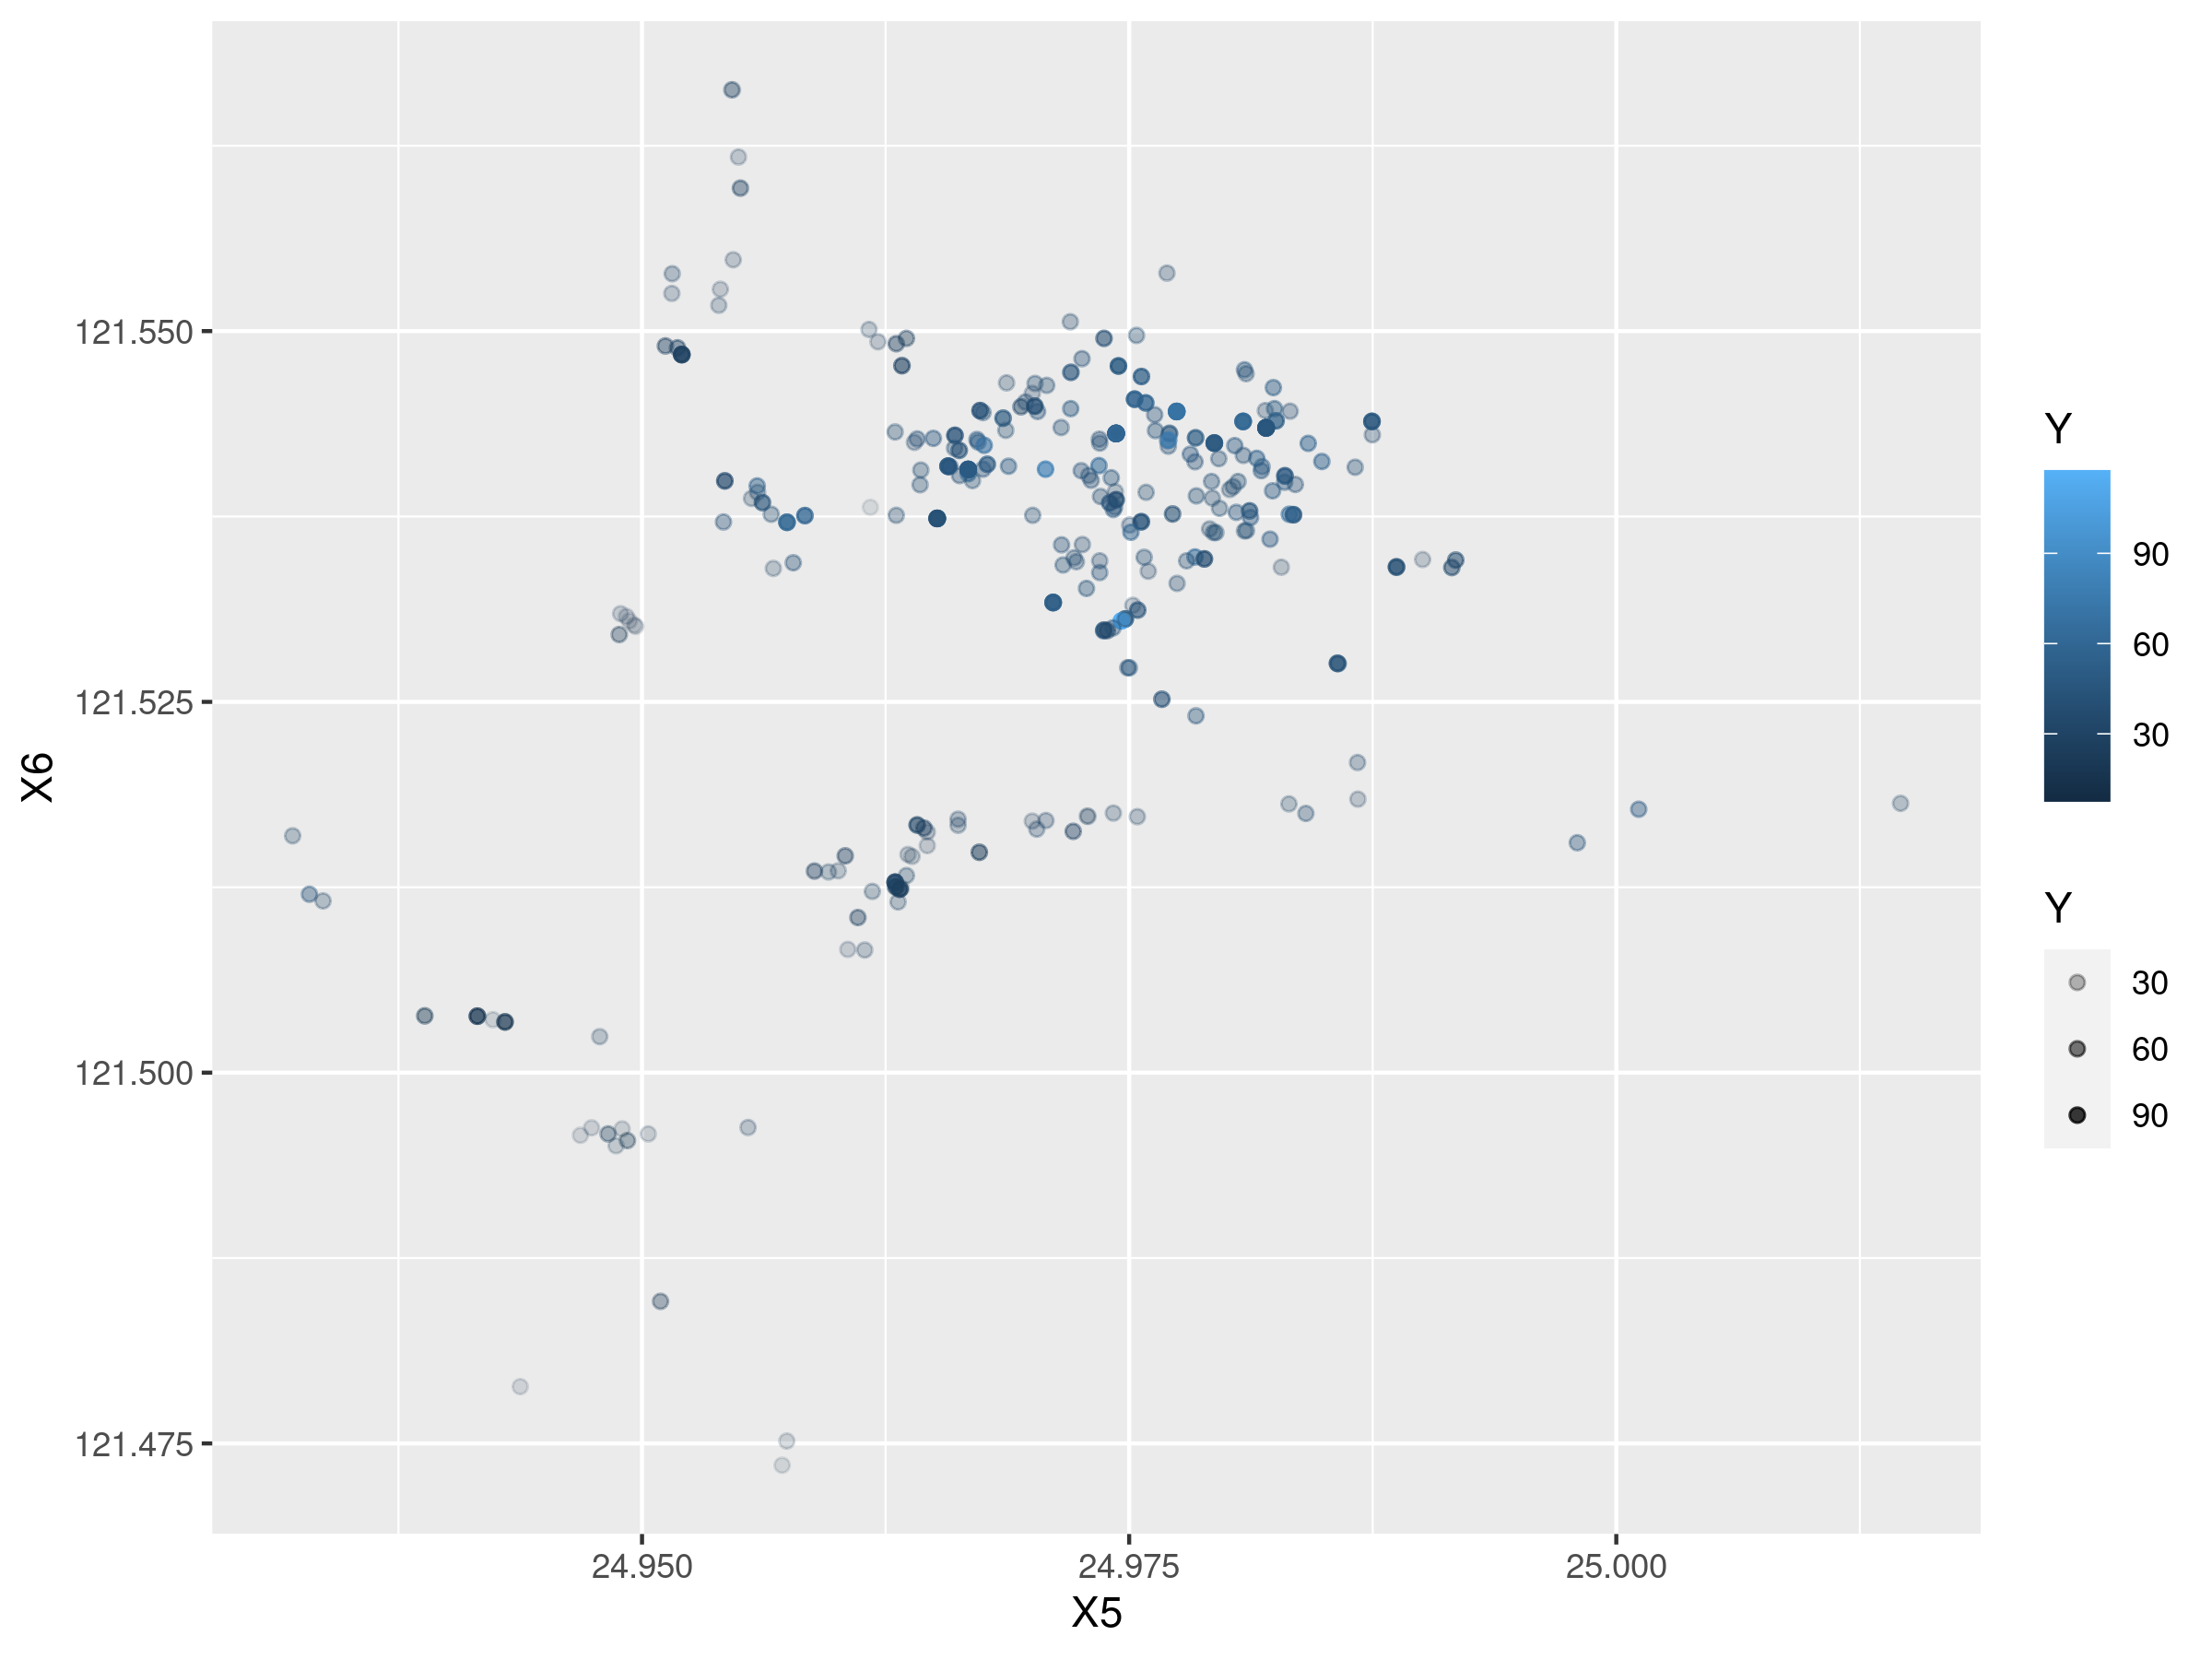

In [14]:
ggplot(df, aes(X5,X6, color = Y))+geom_point(aes(alpha=Y))

6번 그림(위도와 경도)
- 위치 확인
- 중간에 몰려있는 듯 보이는 데이터, 위도와 경도가 영향을 끼친다고 말할 수 있을까?
- 확인을 위해 위도 경도가 들어간 모델과 들어가지 않은 모델을 세워서 비교해보는 계획을 세웠다.

`geom_smooth()` using formula 'y ~ x'



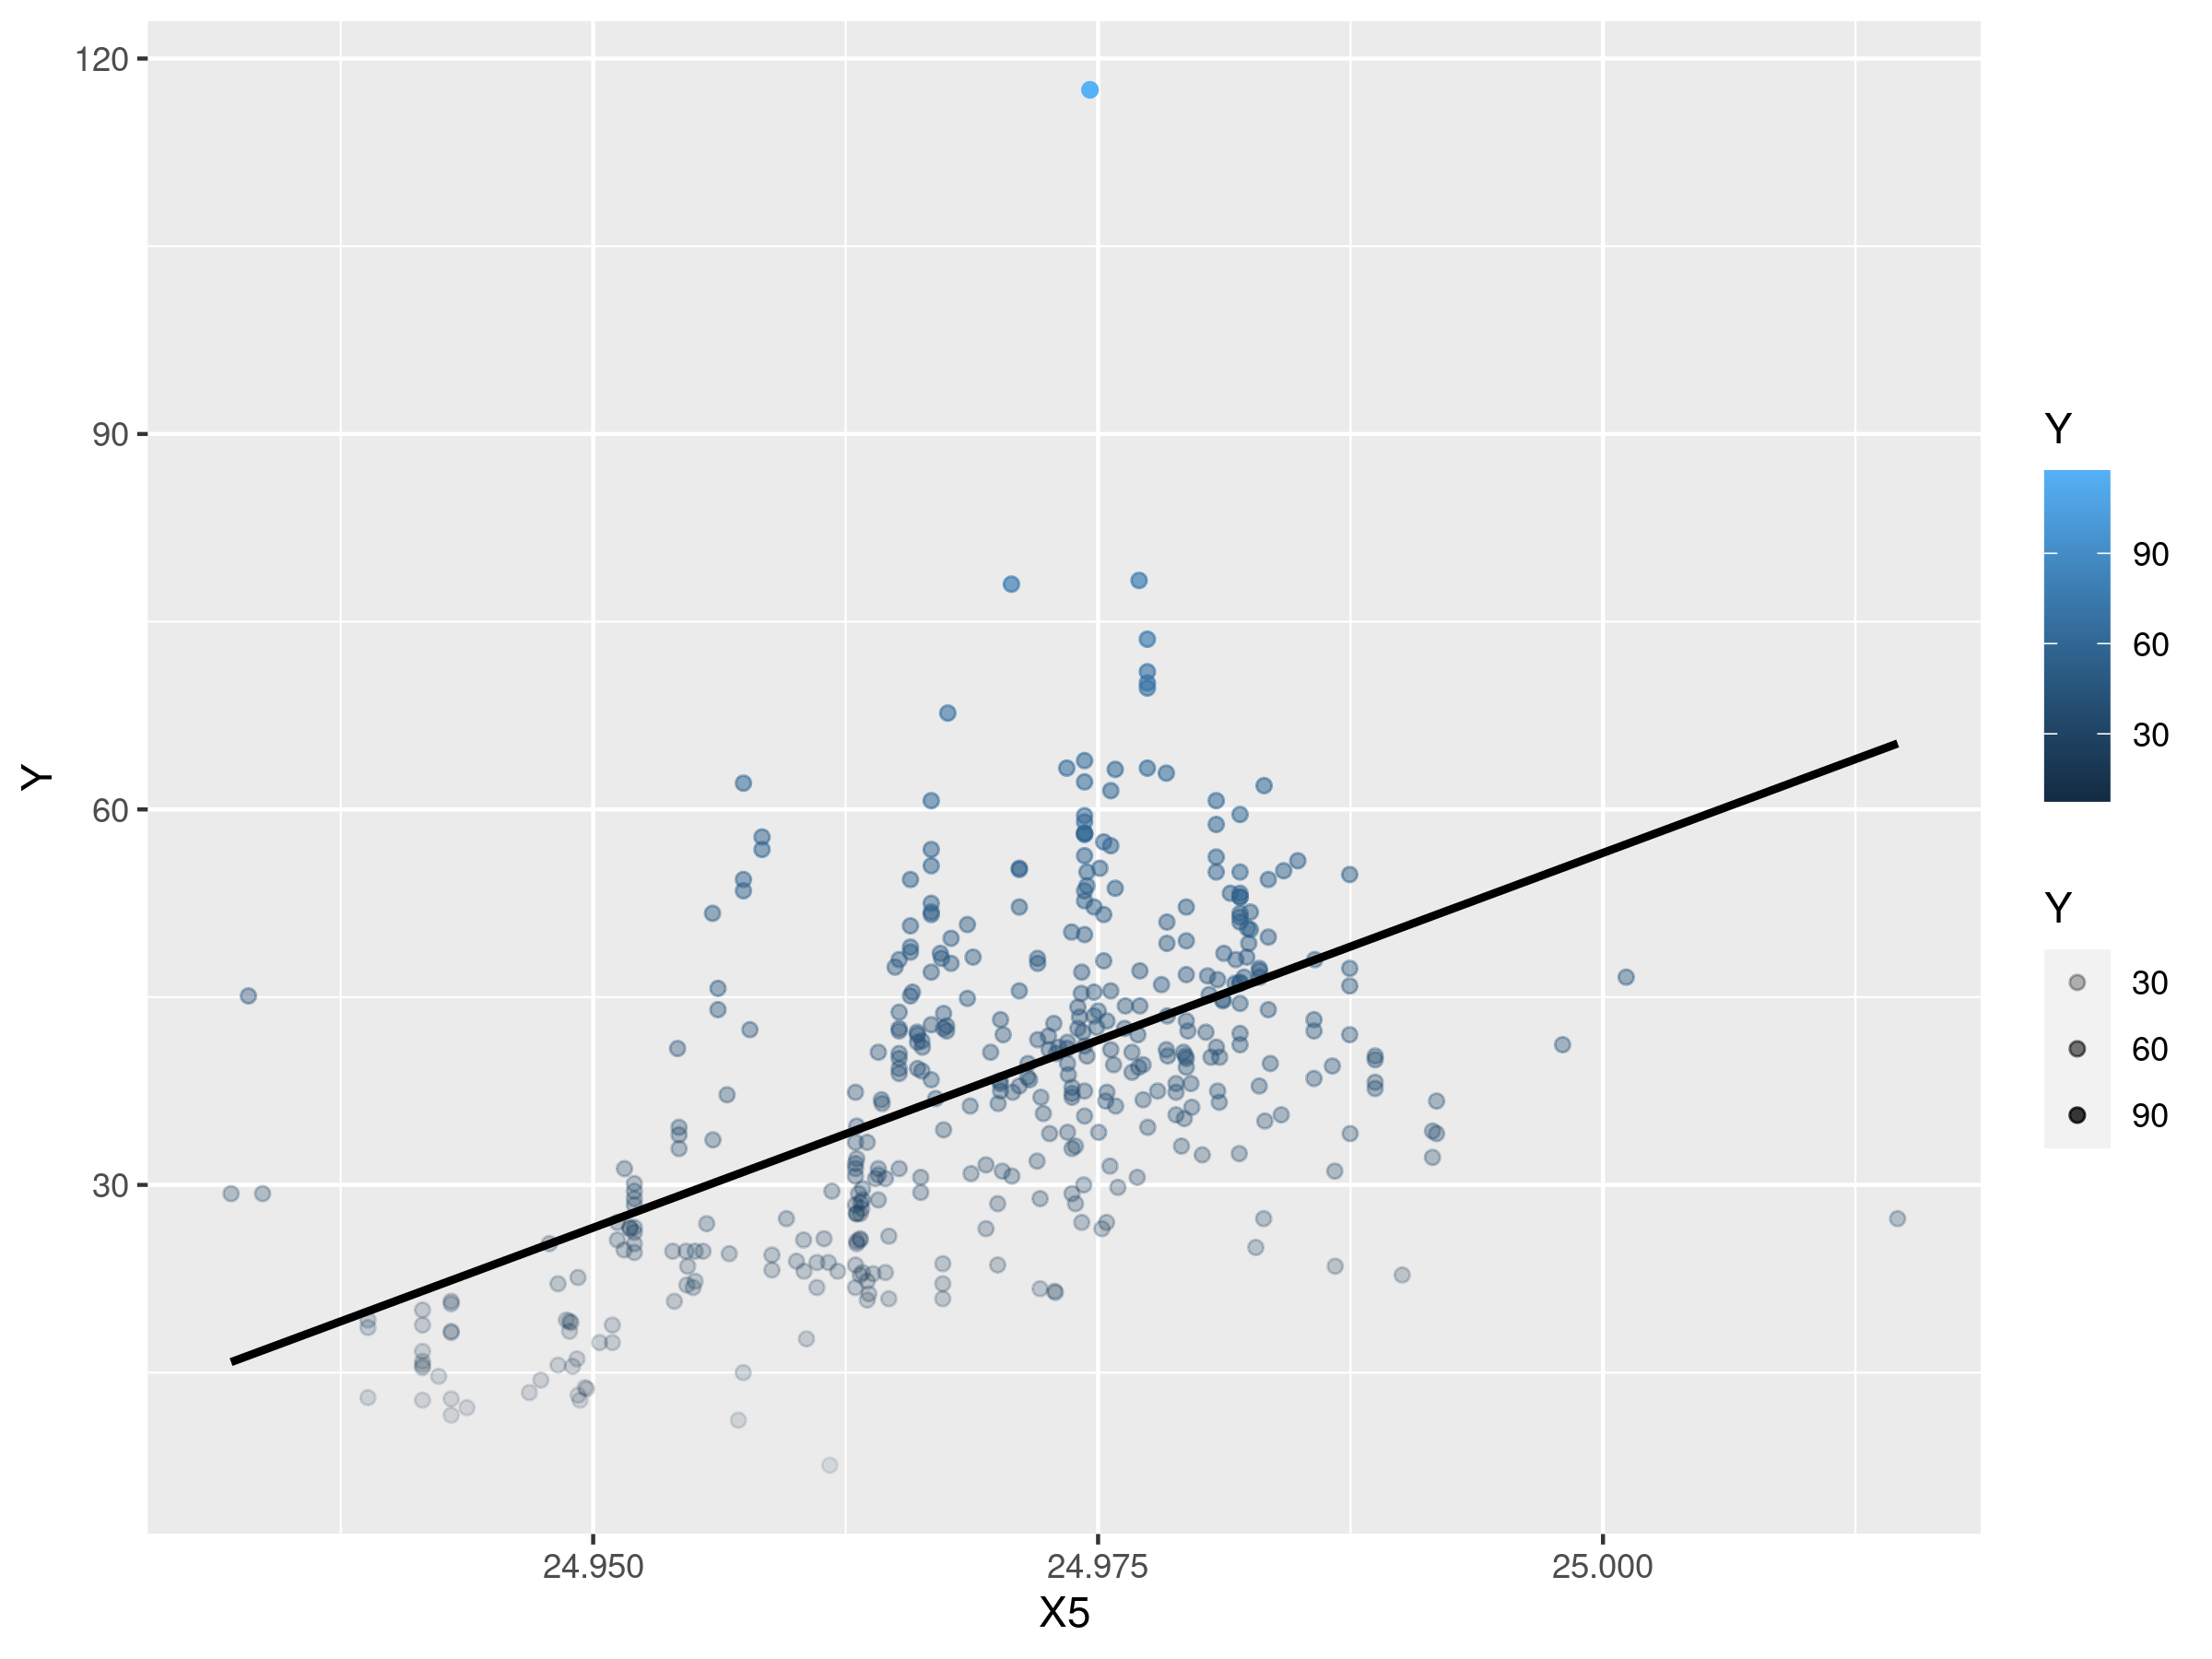

In [15]:
ggplot(df, aes(X5,Y))+geom_point(aes(color = Y,alpha=Y))+geom_smooth(method=lm, se=FALSE, col='black', size=1)

7번 그림
- 위도가 높아질수록 house age가 높아지는 trend가 보였다.

`geom_smooth()` using formula 'y ~ x'



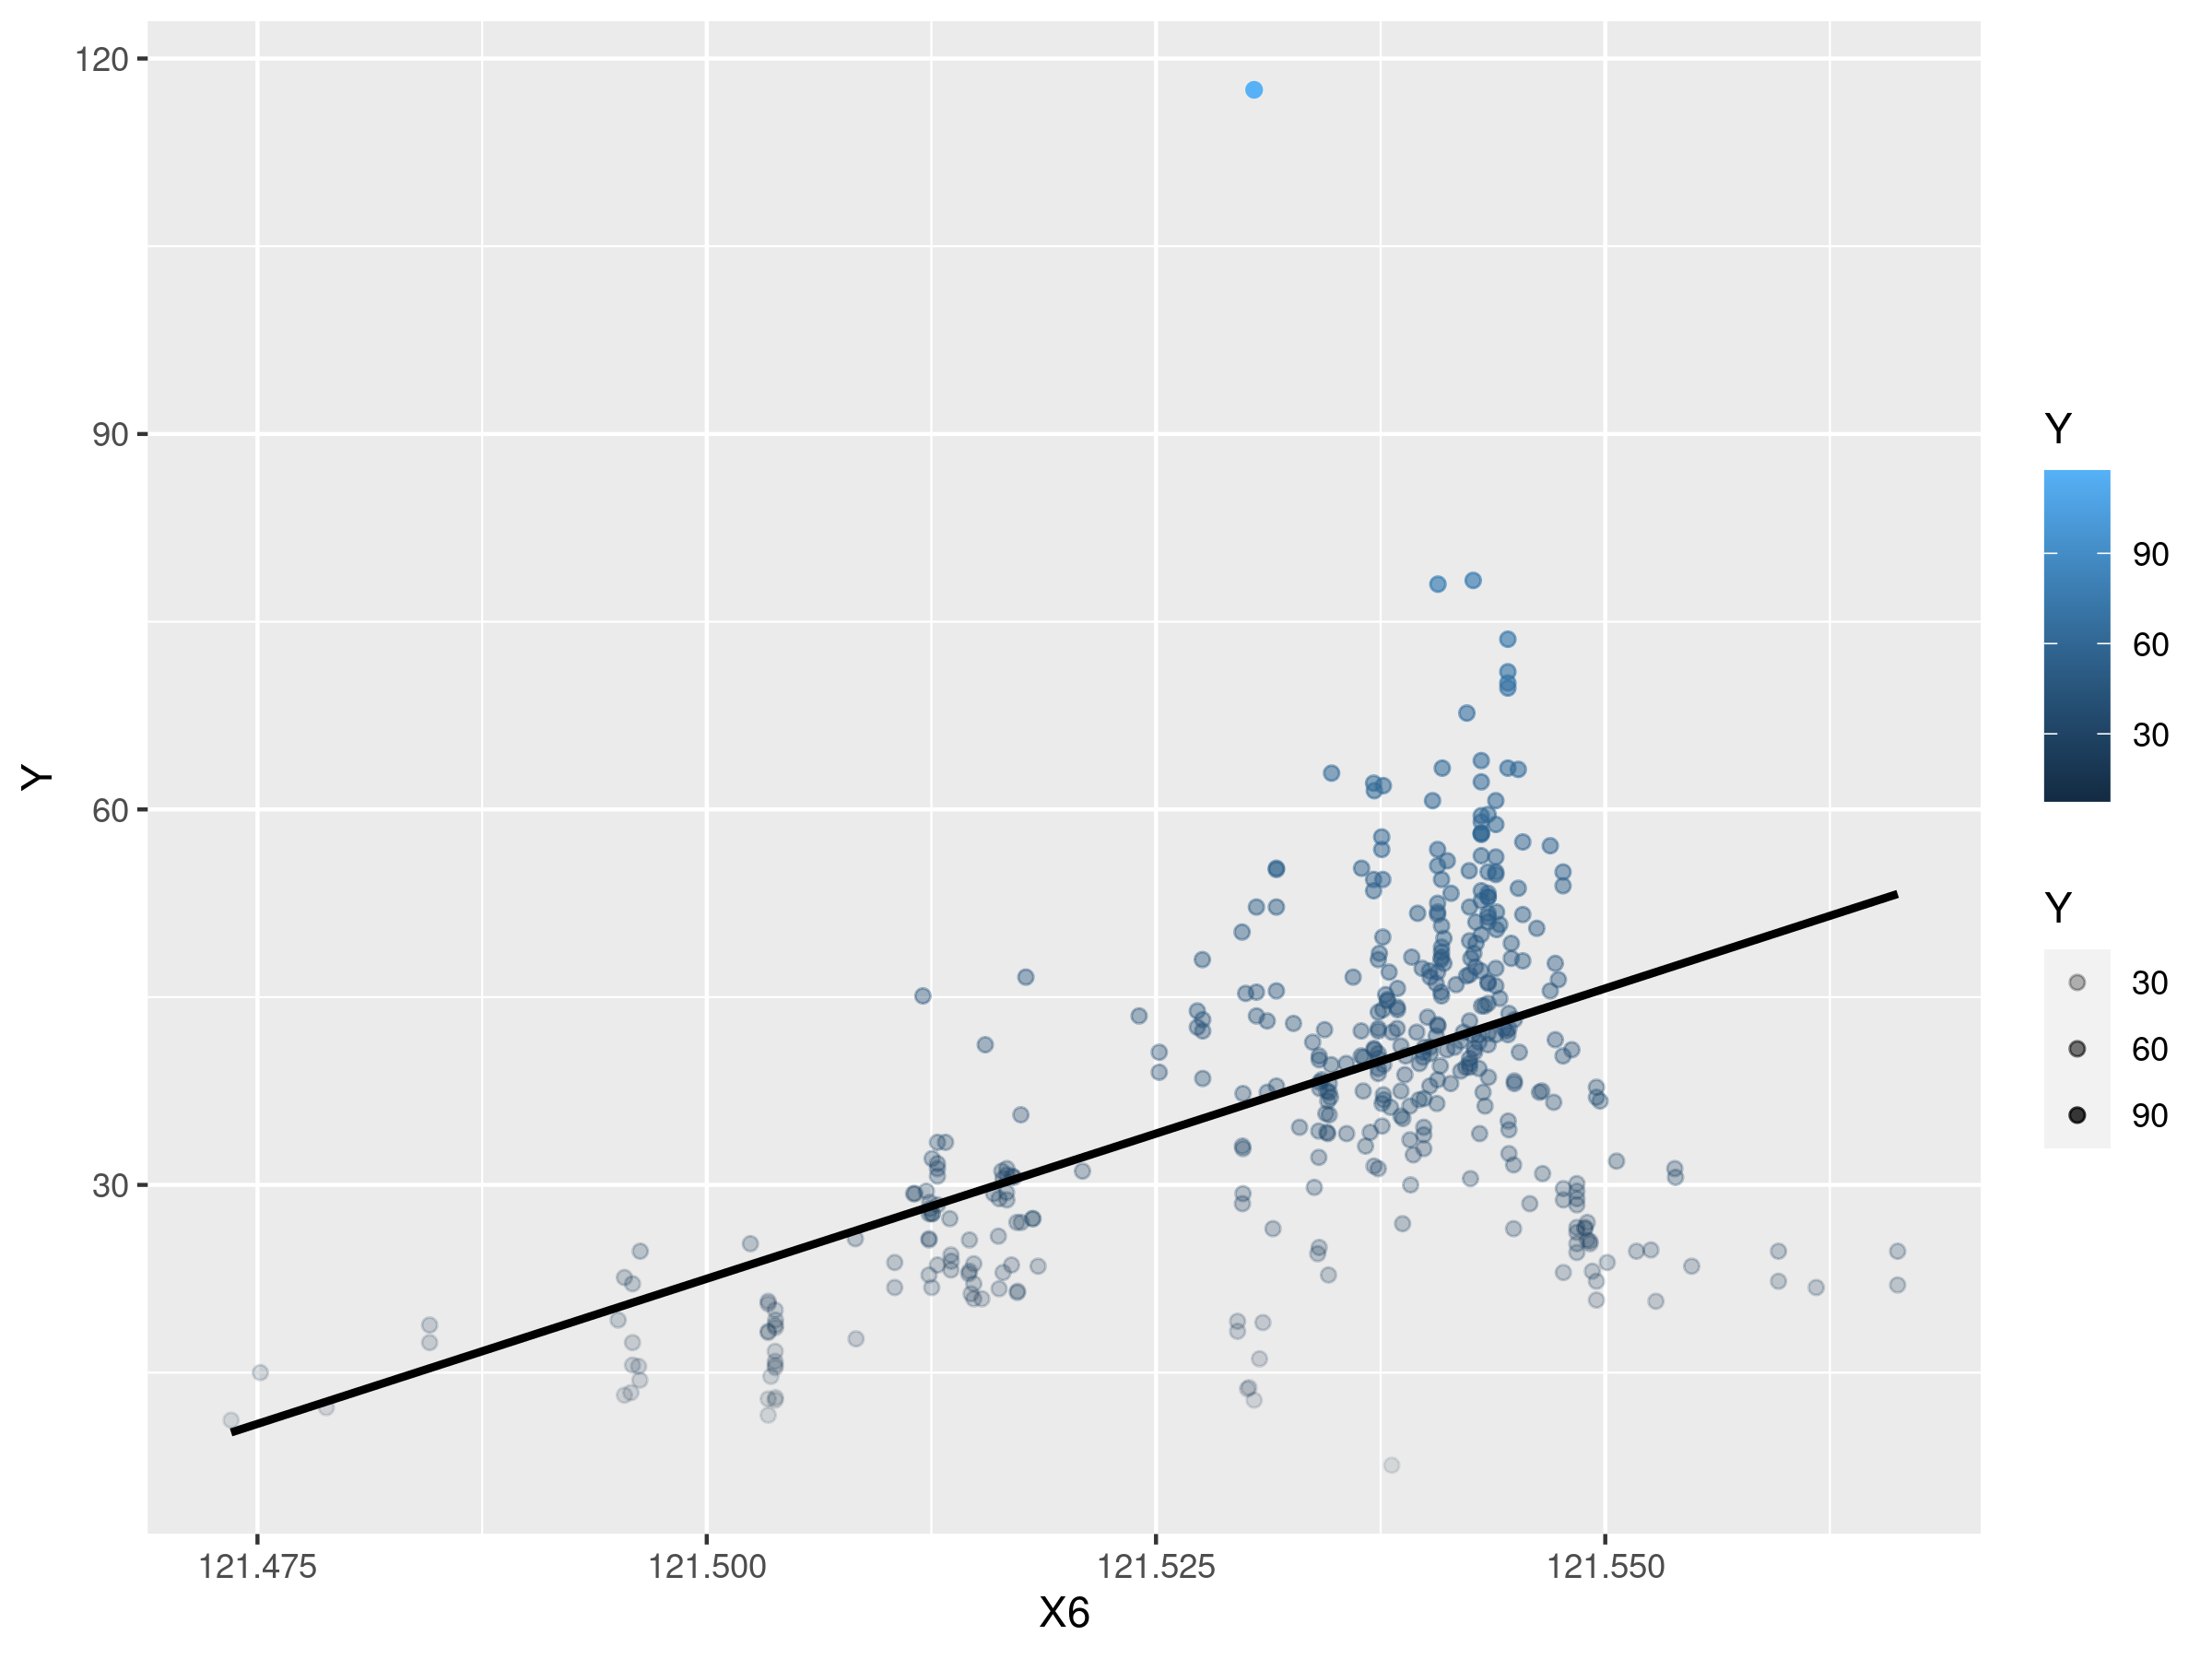

In [16]:
ggplot(df, aes(X6,Y))+geom_point(aes(color = Y,alpha=Y))+geom_smooth(method=lm, se=FALSE, col='black', size=1)

8번 그림
- 경도 그림에서도 house price와 정방향으로 함께 증가하는 trend가 보였다.

설명변수는 확인한 trend있는 데이터들을, 반응변수는 집값인 Y 변수를 세워서 모델 설정을 진행할 것이다.

## 2. 모형 적합

In [17]:
model1<- lm(Y~ X2+X3+X4+X5,data=df)

In [18]:
model2<- lm(Y~ X1+X2+X3+X4,data=df)

`model1` 는 집 나이, 역과의 거리, 편의시설 수, 위도가 설명변수로 포함한 모델
- X6이 model 1에 포함되지 않은 이유
    - 위도, 경도 변수를 모두 포함하고 모델을 보았을 때 경도 변수의 p값이 유의수준보다 크게나와 유의미하지 않은 변수라 판단하고 해당 변수는 포함하지 않고 모형을 설정함
- X1이 model 1에 포함되지 않은 이유
    - date 변수를 포함해서 모델을 보았을때 등분산 가정을 만족하지 못해 해당 변수는 포함하지 않은채 모형을 설정함

`model2`는 위도,경도를 제외한 date, 집 나이, 역과의 거리, 편의시설 수를 설명변수로 포함한 모델

두 모형을 봐서 더 적합하다 판단되는 모델을 선택하고자 한다.

## 3. 모형 해석 및 추론

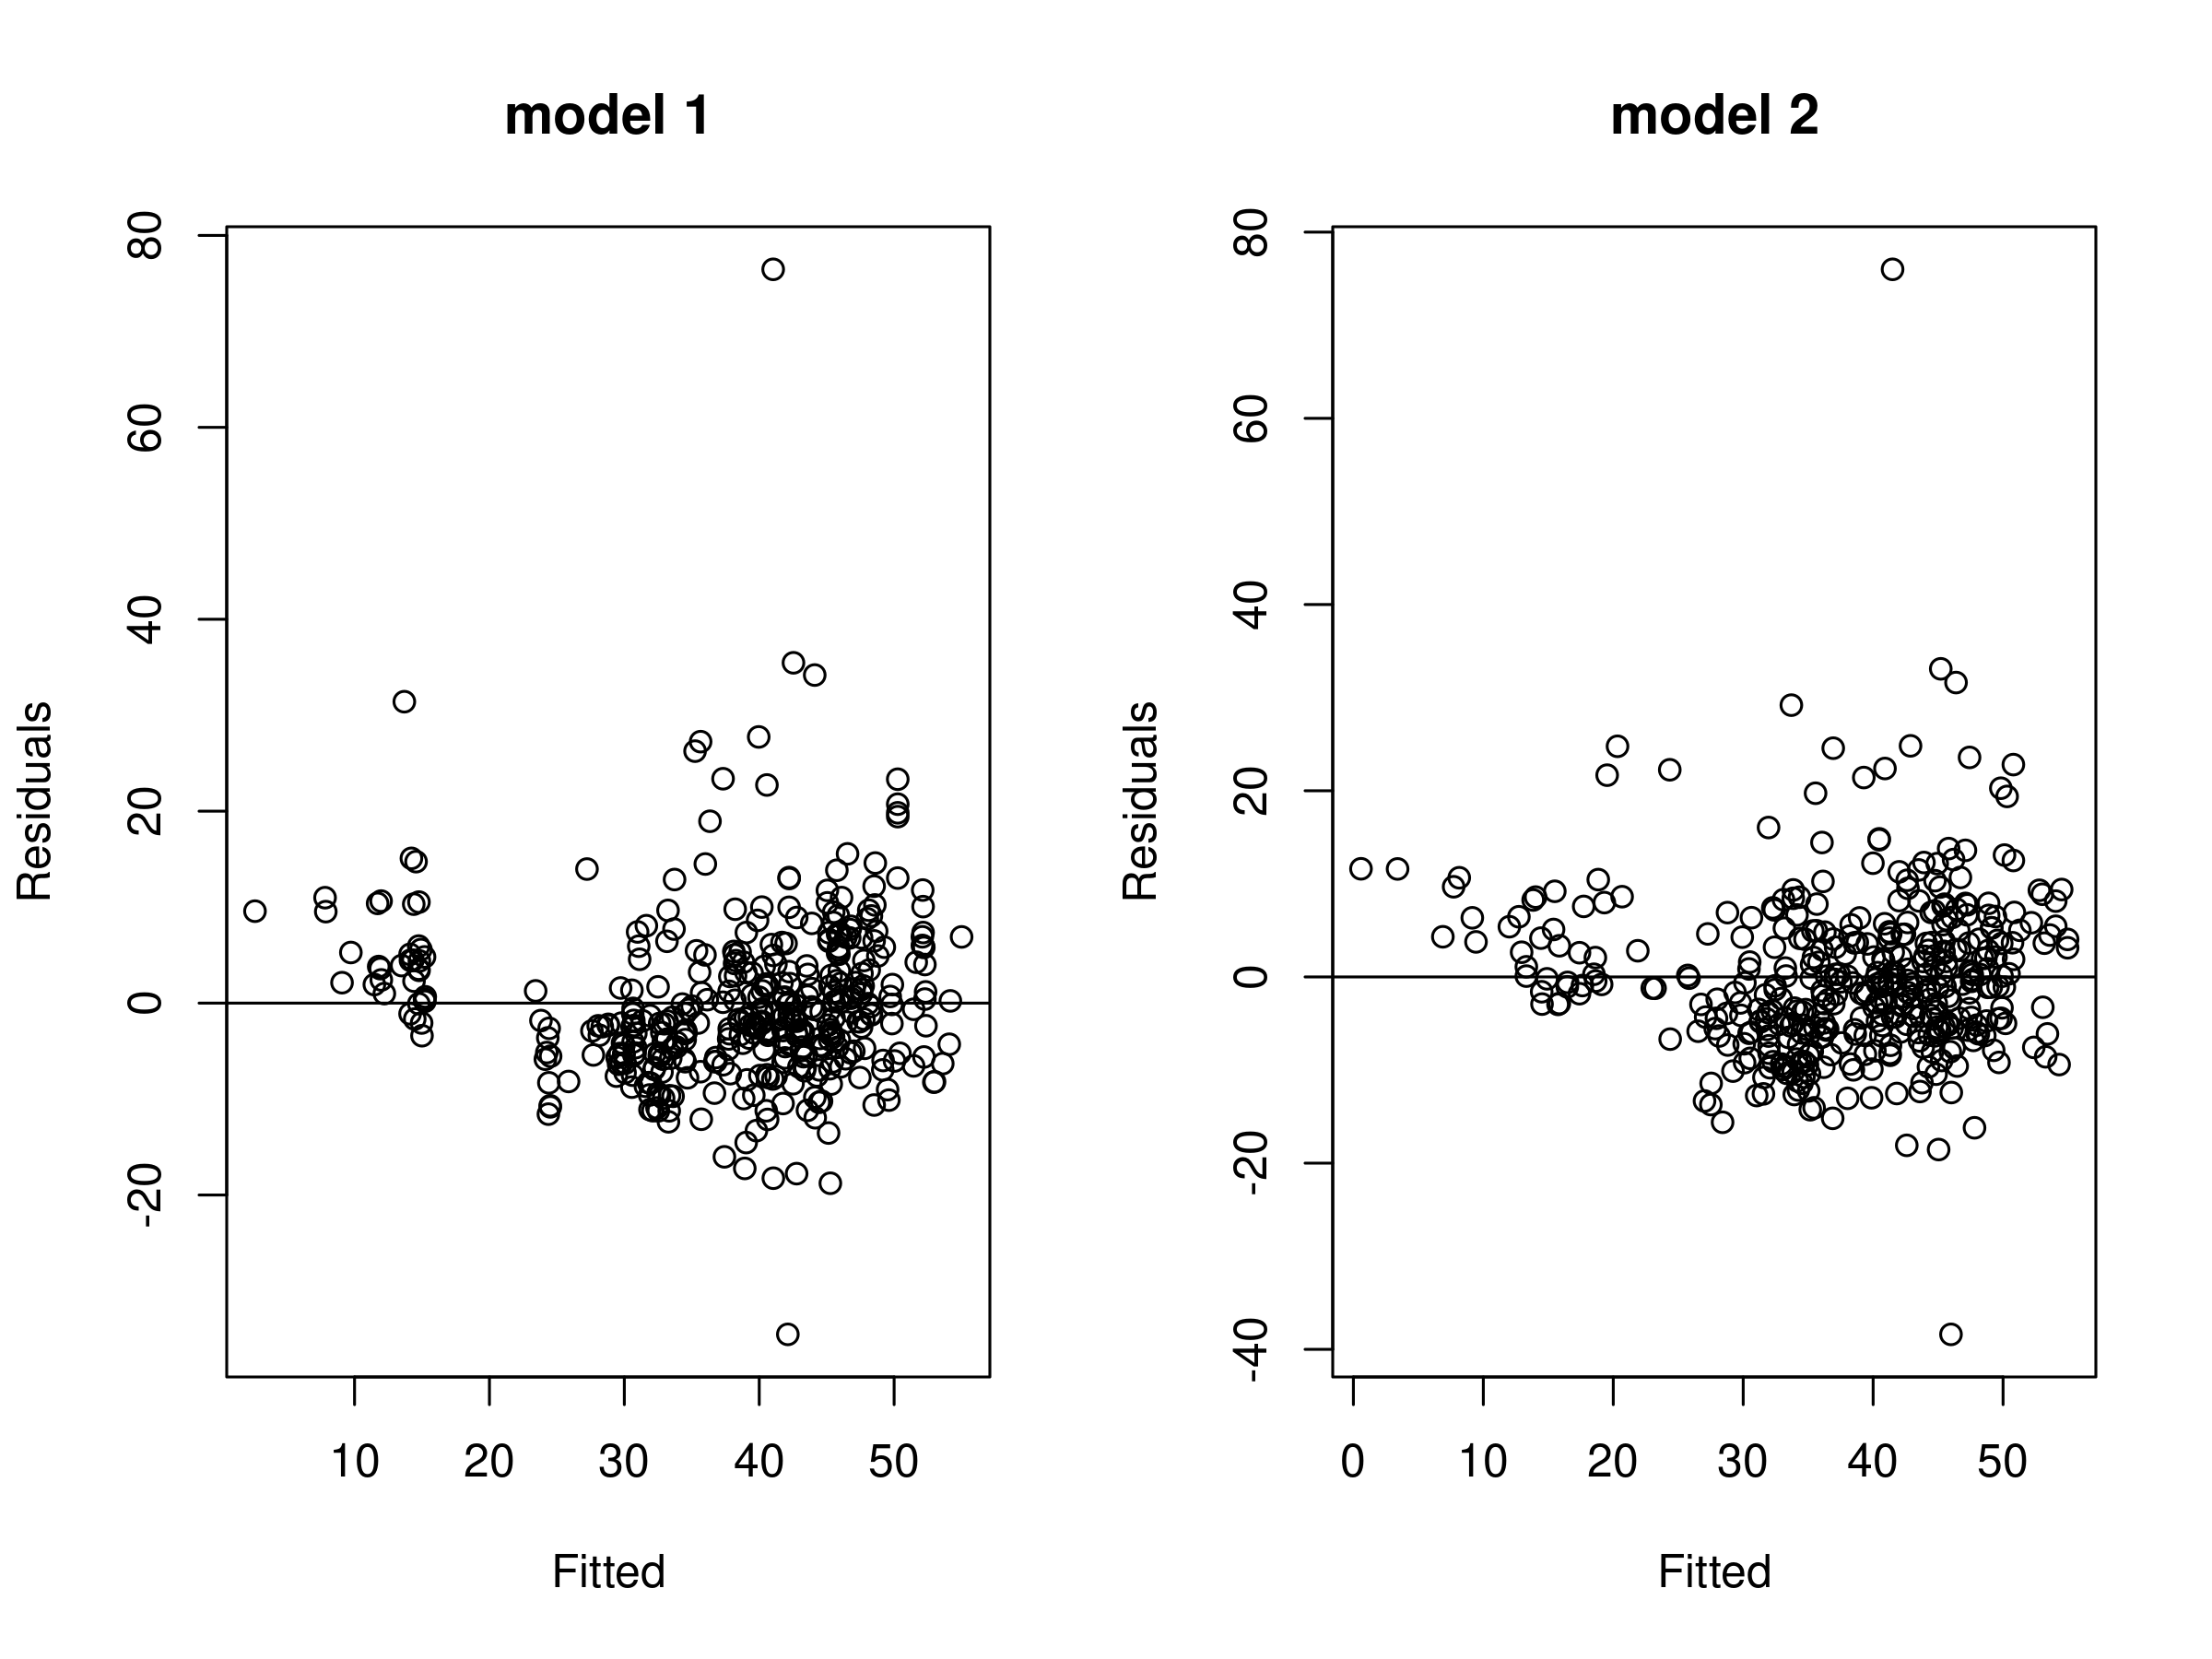

In [19]:
par(mfrow=c(1,2))
plot(fitted(model1),residuals(model1),xlab="Fitted",ylab="Residuals",main='model 1')
abline(h=0)
plot(fitted(model2),residuals(model2),xlab="Fitted",ylab="Residuals",main='model 2')
abline(h=0)

plot만 보면 두 모델 모두 등분산 가정을 만족하는 것 같다.

In [20]:
library(car)

Loading required package: carData



In [21]:
ncvTest(model1)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.521196, Df = 1, p = 0.21744

In [22]:
ncvTest(model2)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 2.467842, Df = 1, p = 0.1162

$H_0$ : 등분산, $H_1$ : 이분산

p값을 보니 유의수준 5%에서 기각 못하니, 두 모델 모두 등분산이라는 결론이 나왔다.

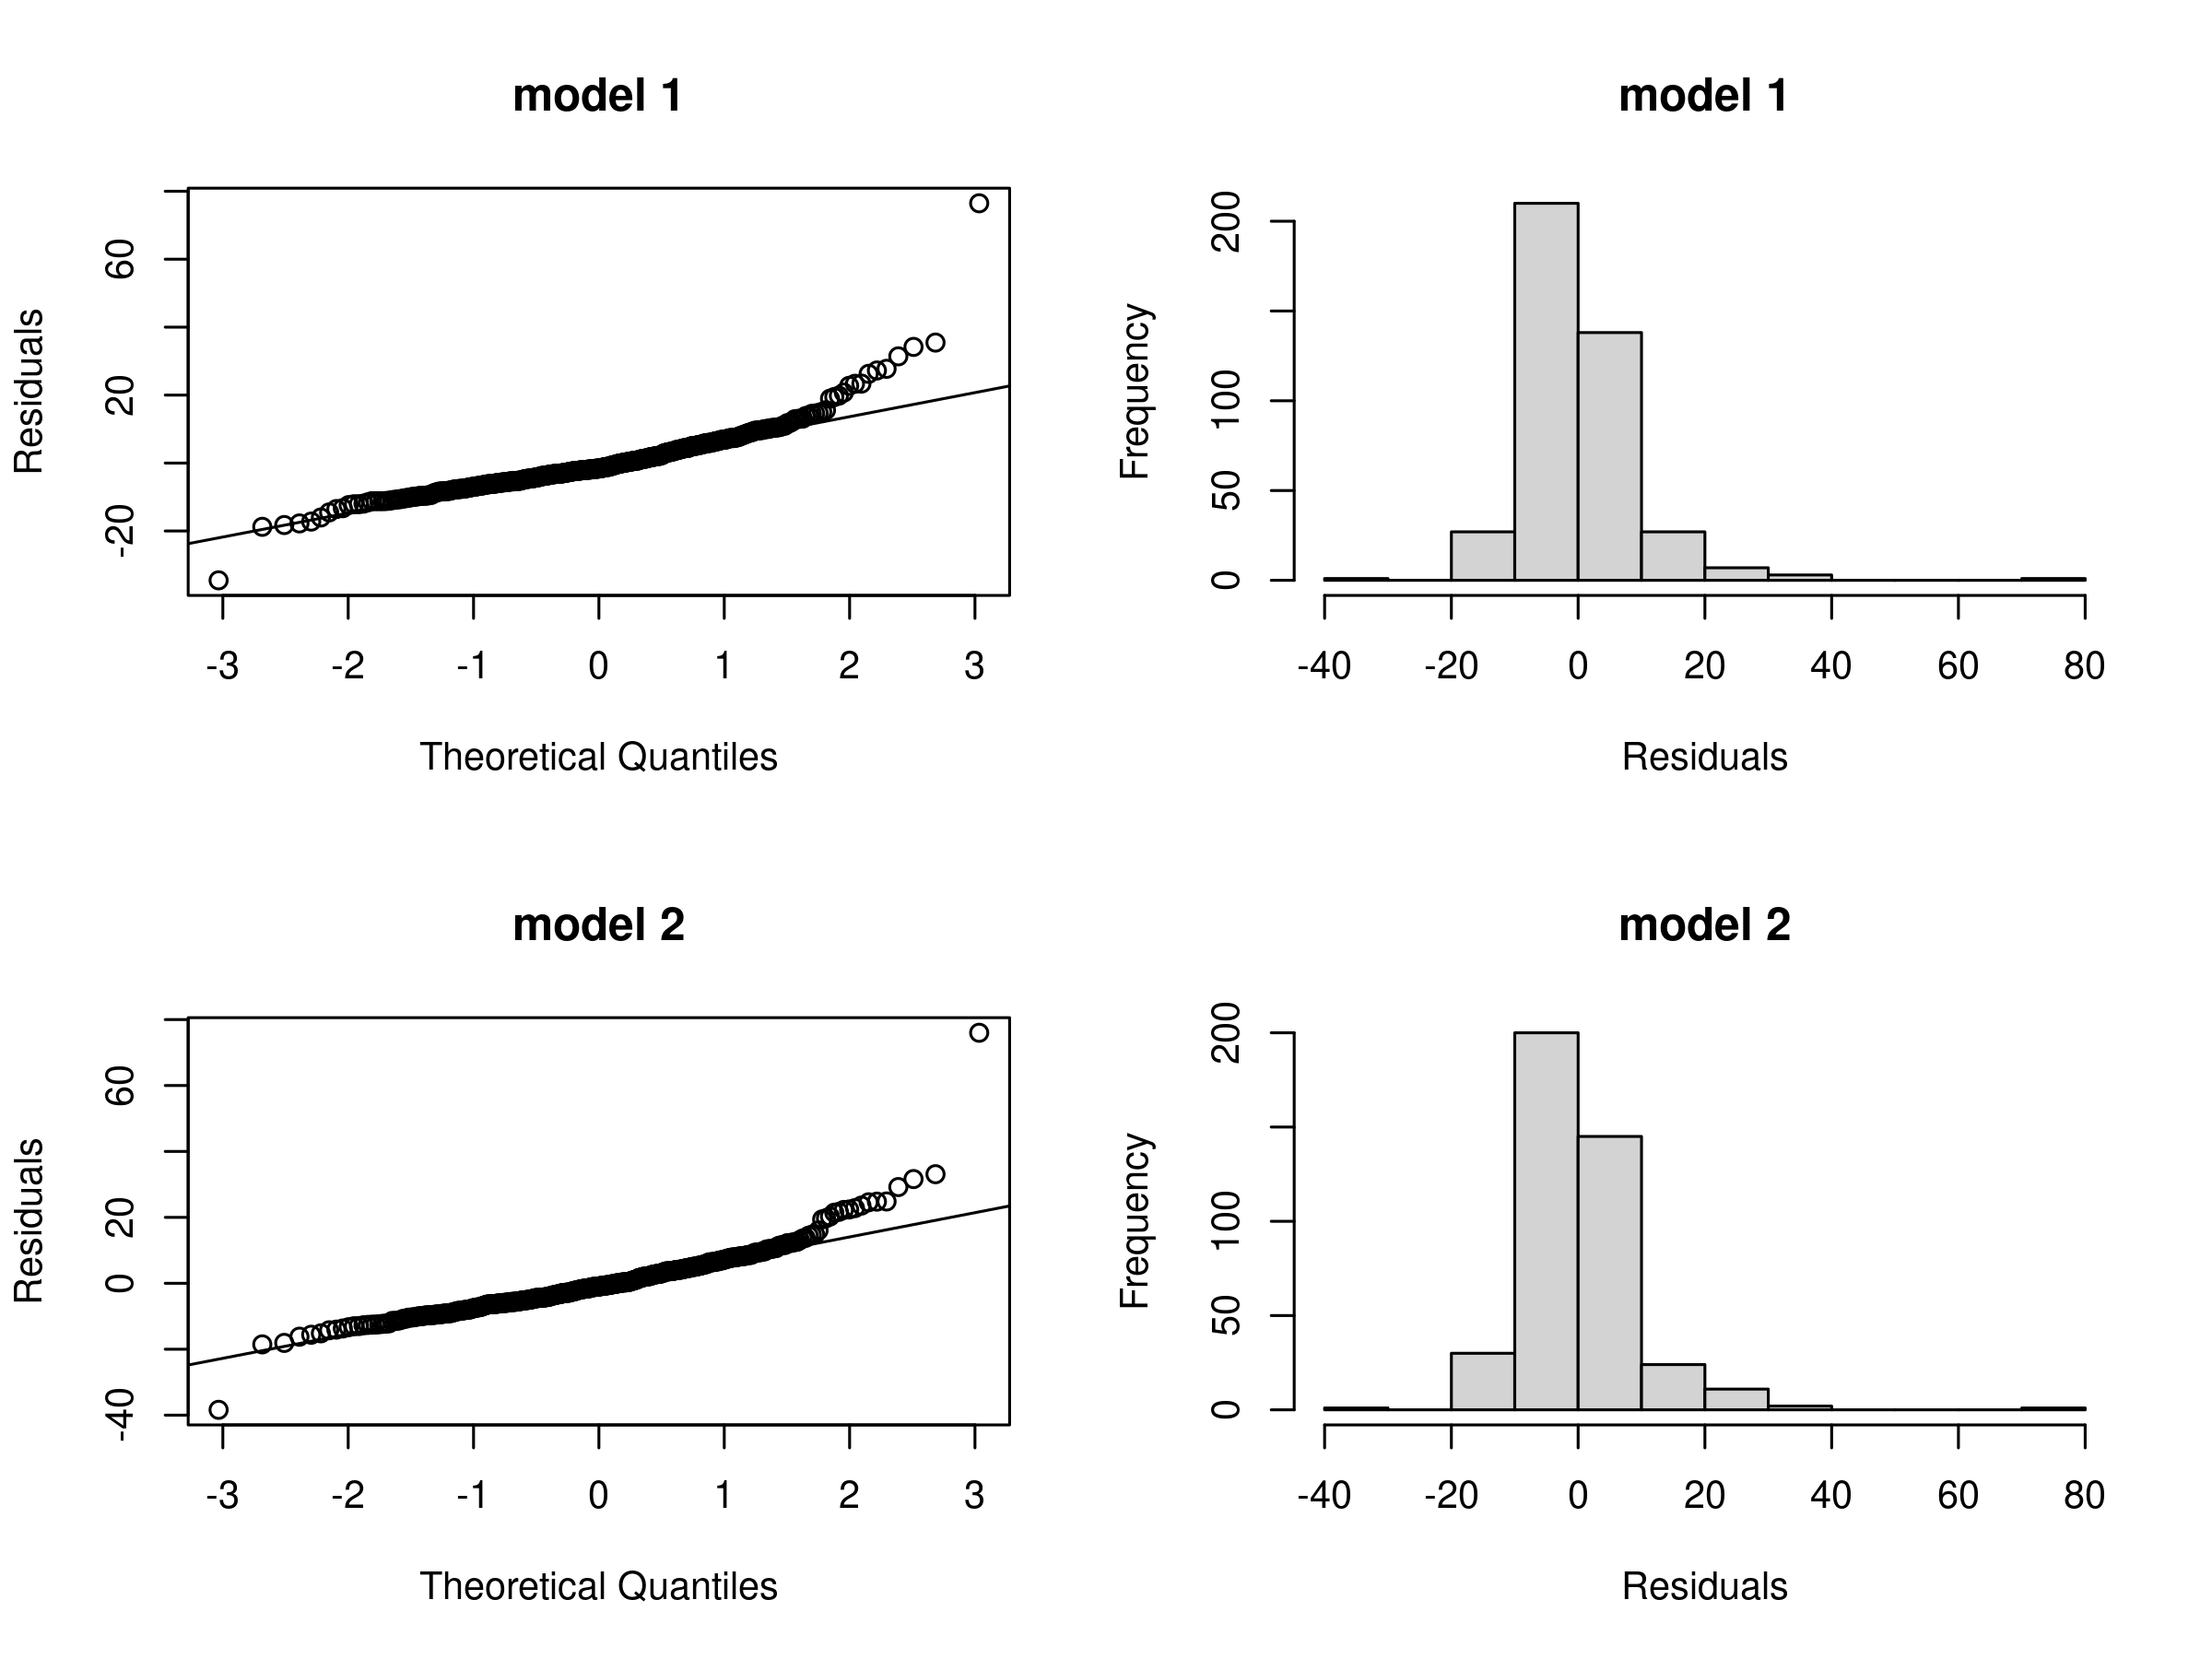

In [23]:
par(mfrow=c(2,2))
qqnorm(residuals(model1),ylab="Residuals",main="model 1")
qqline(residuals(model1))
hist(residuals(model1),xlab="Residuals",main="model 1")
qqnorm(residuals(model2),ylab="Residuals",main="model 2")
qqline(residuals(model2))
hist(residuals(model2),xlab="Residuals",main="model 2")

두 모델 모두 plot을 보니 이상치가 존재하긴 하여 qq plot에 맞지 않는 것 같이 보이지만, hist를 보면 종모양을 띄는 것 같다.

$H_0$ : 정규성 가정, $H_1$ : 정규성 가정 만족X

In [24]:
shapiro.test(residuals(model1))


	Shapiro-Wilk normality test

data:  residuals(model1)
W = 0.86768, p-value < 2.2e-16


In [25]:
shapiro.test(residuals(model2))


	Shapiro-Wilk normality test

data:  residuals(model2)
W = 0.88655, p-value < 2.2e-16


In [26]:
length(df$Y)

[1] 414

정규성 검정 결과 두 모델 모두 귀무가설을 기각하여 정규성 가정을 만족하지 못하지만, 데이터 수가 충분히 크기 때문에 정규성을 만족한다고 보았다.

In [27]:
model1


Call:
lm(formula = Y ~ X2 + X3 + X4 + X5, data = df)

Coefficients:
(Intercept)           X2           X3           X4           X5  
 -5.916e+03   -2.687e-01   -4.175e-03    1.165e+00    2.386e+02  


In [28]:
model2


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = df)

Coefficients:
(Intercept)           X1           X2           X3           X4  
 -1.159e+04    5.780e+00   -2.545e-01   -5.513e-03    1.258e+00  


In [29]:
require(lmtest)

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




$H_0$ : 독립성 가정, $H_1$ : 독립성 가정 만족X

In [30]:
dwtest(model1)


	Durbin-Watson test

data:  model1
DW = 2.1504, p-value = 0.9383
alternative hypothesis: true autocorrelation is greater than 0


In [31]:
dwtest(model2)


	Durbin-Watson test

data:  model2
DW = 2.1145, p-value = 0.8798
alternative hypothesis: true autocorrelation is greater than 0


더빈왓슨 검정 결과 두 모델 모두 귀무가설을 기각하지 못하여 두 모델에서 독립성에 문제가 없다는 결론을 내렸다.

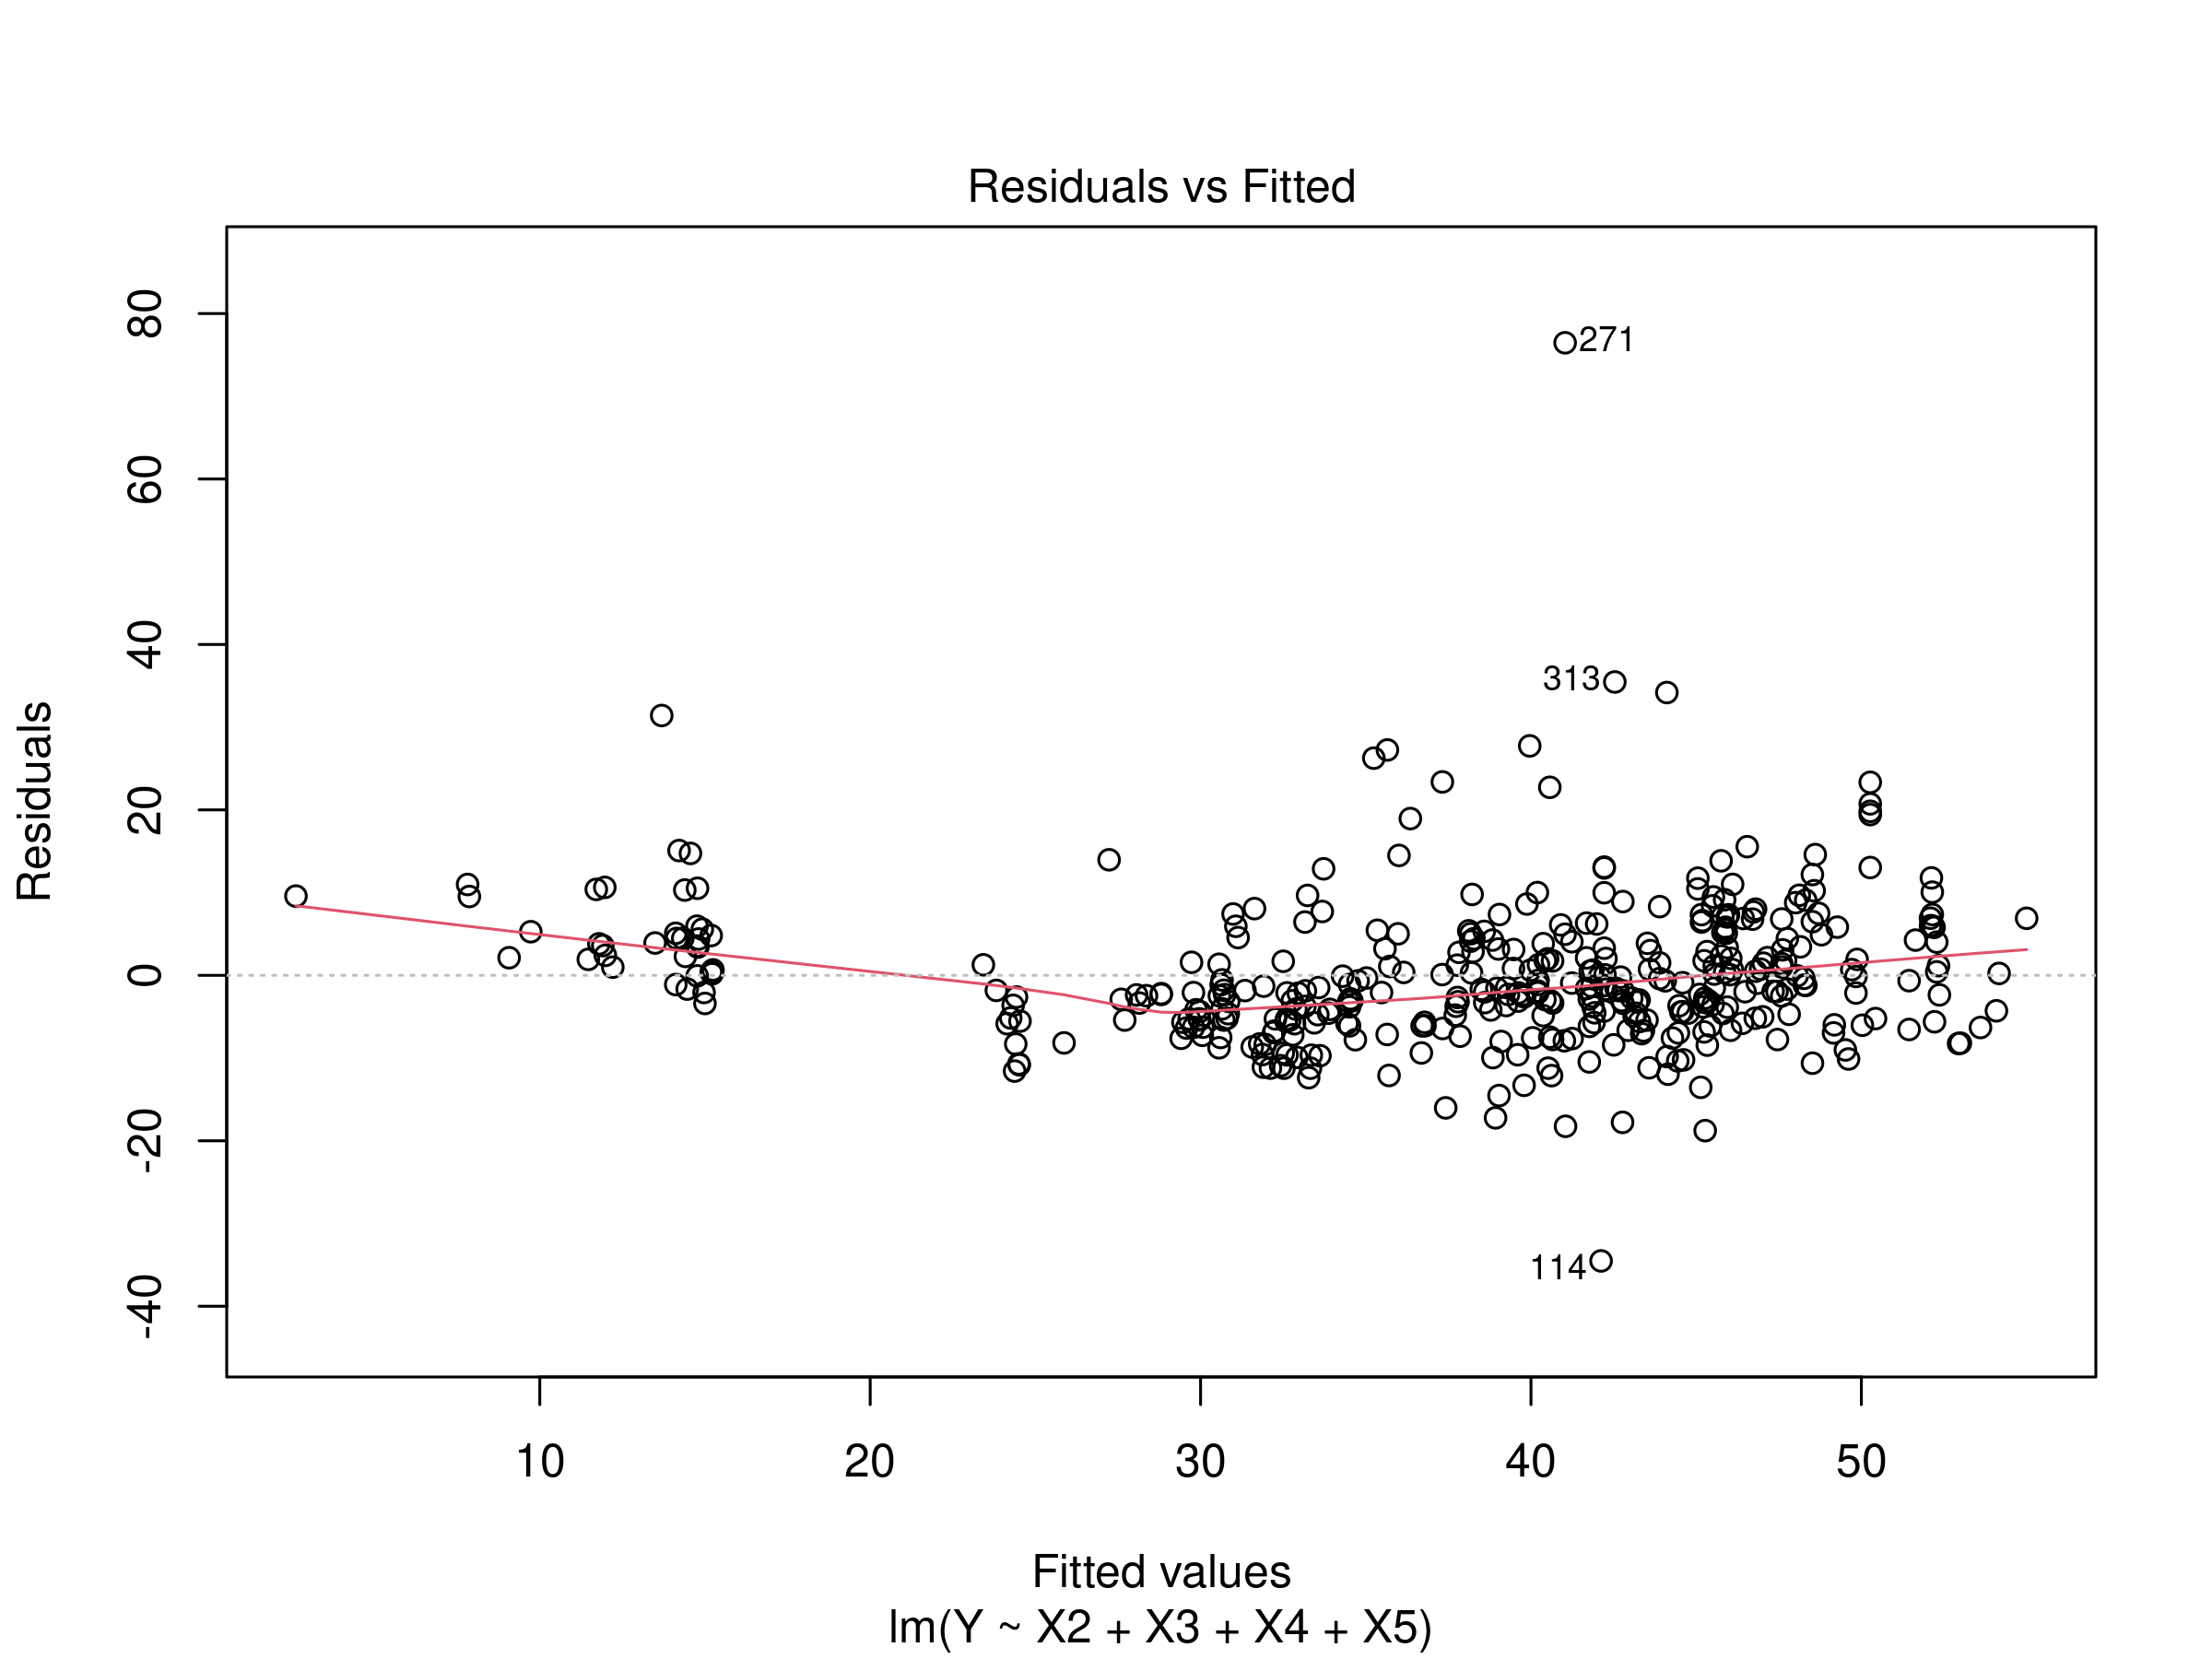

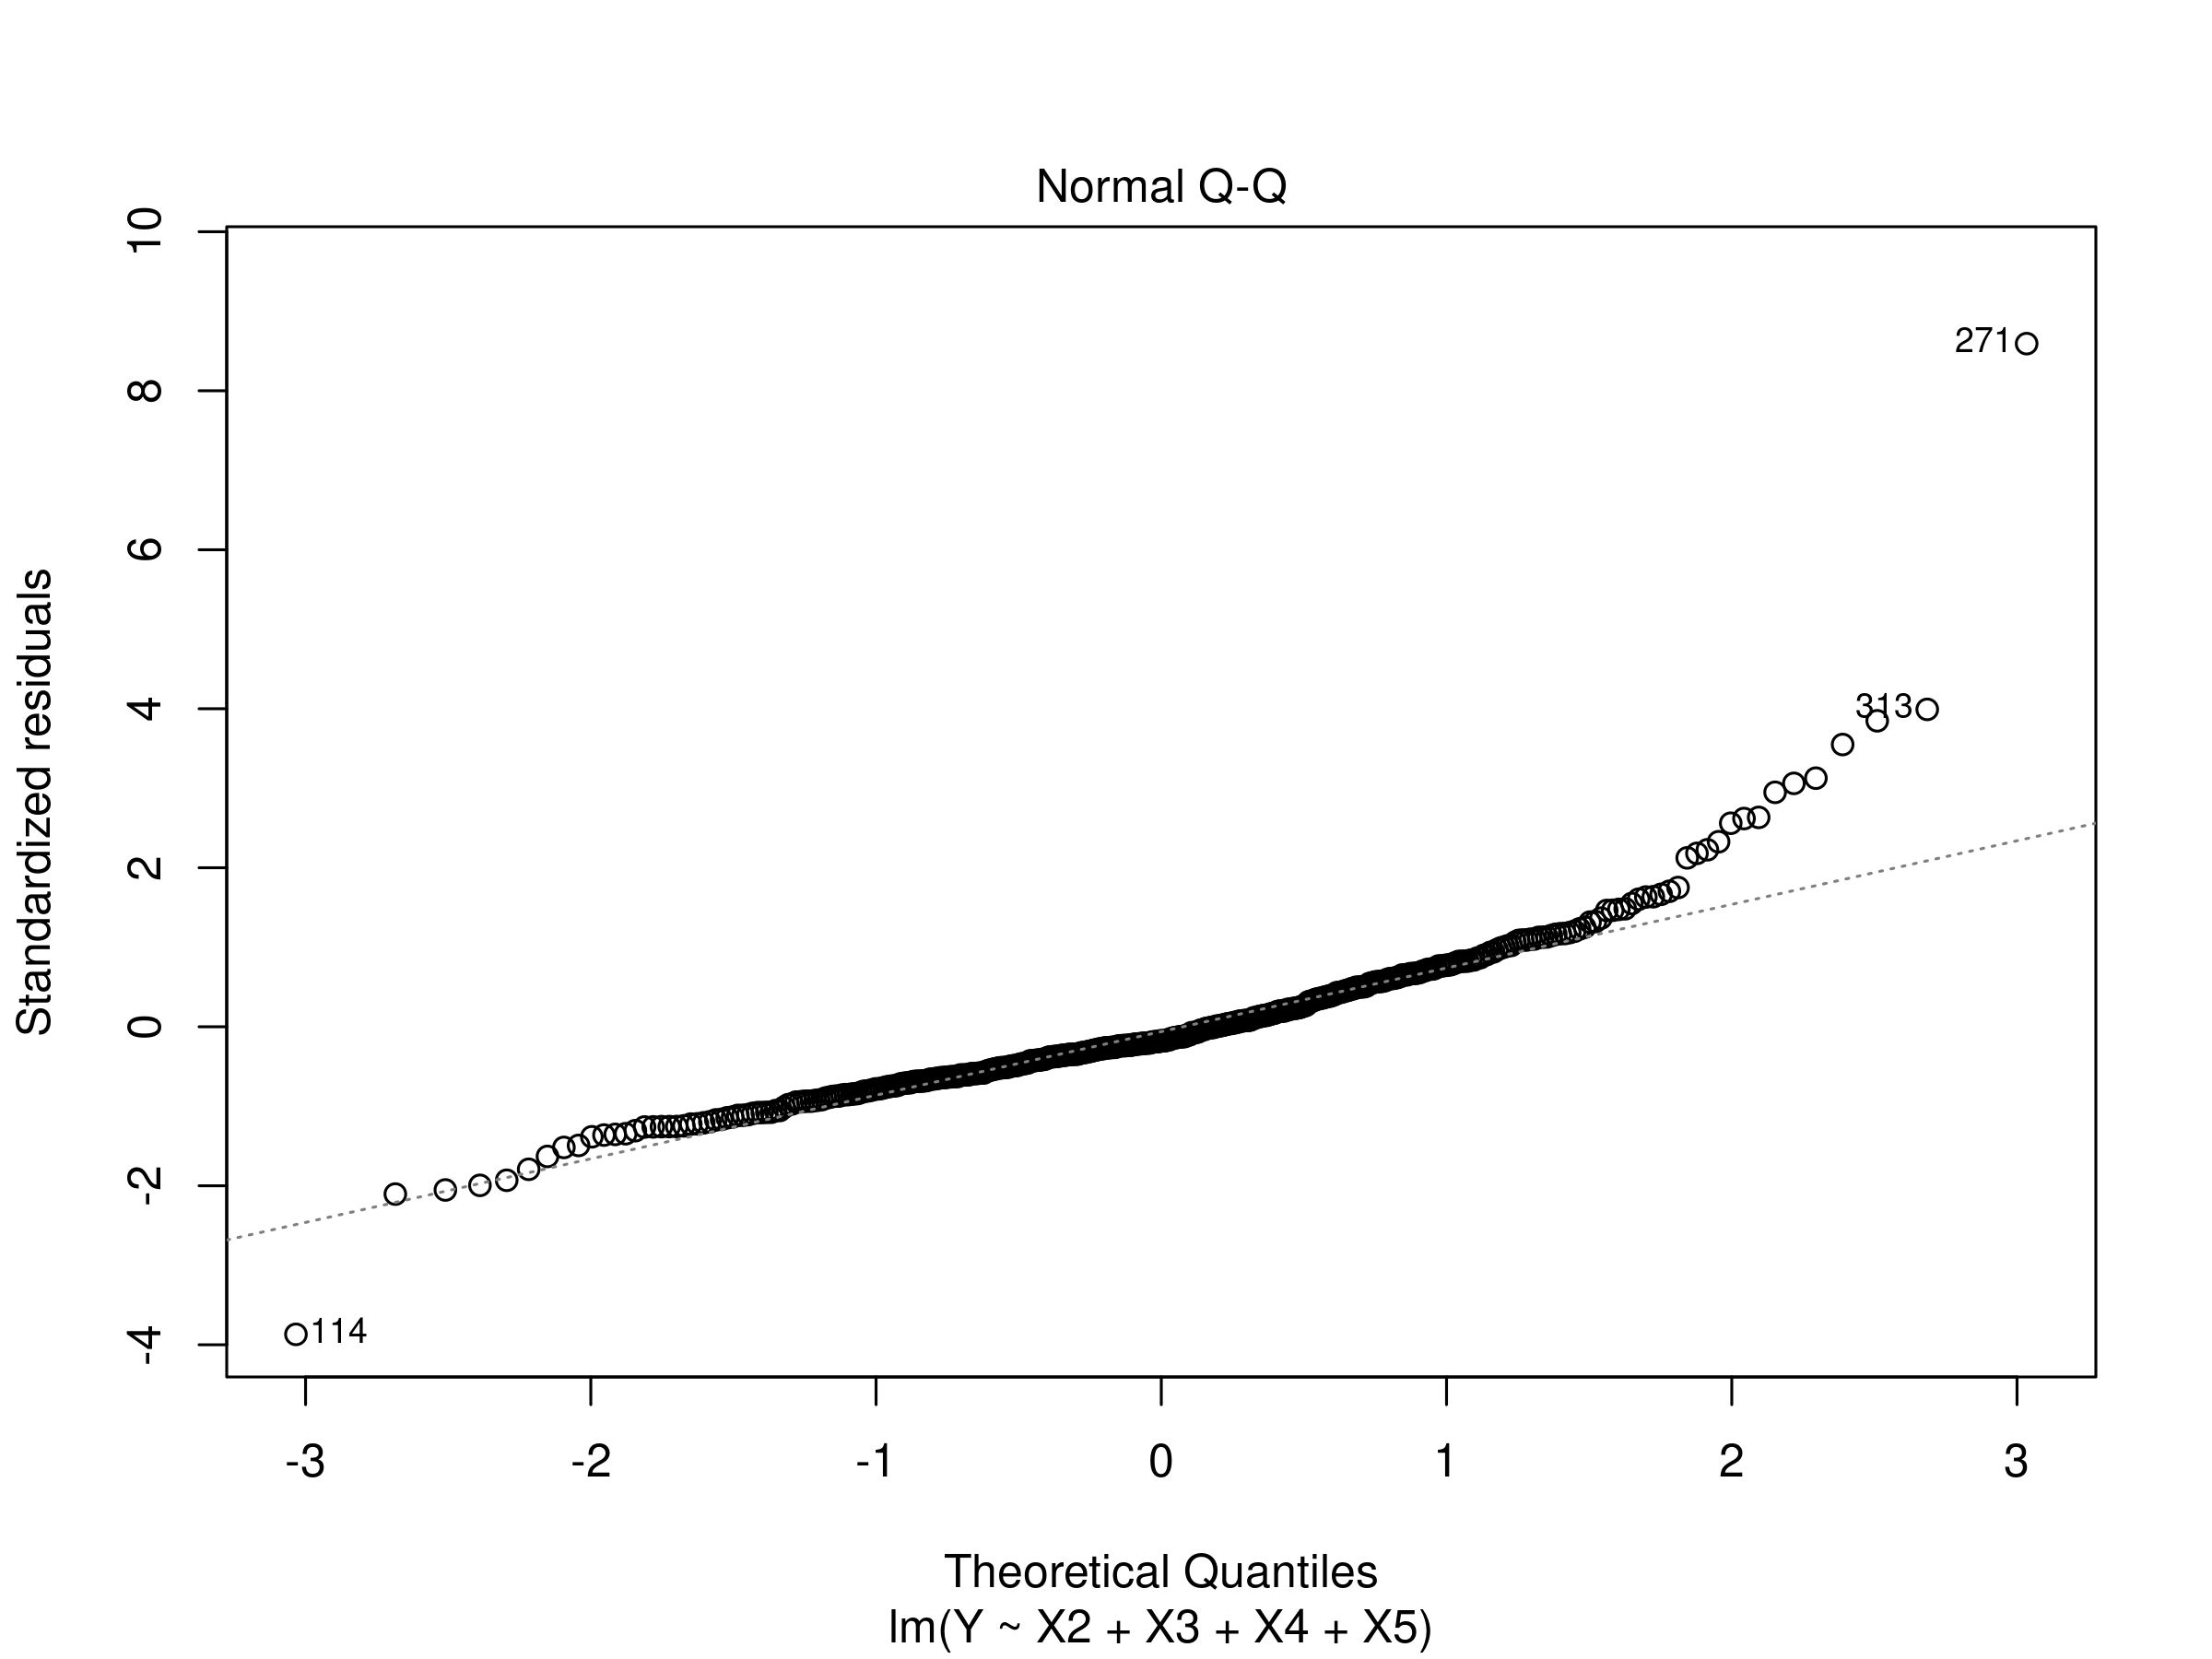

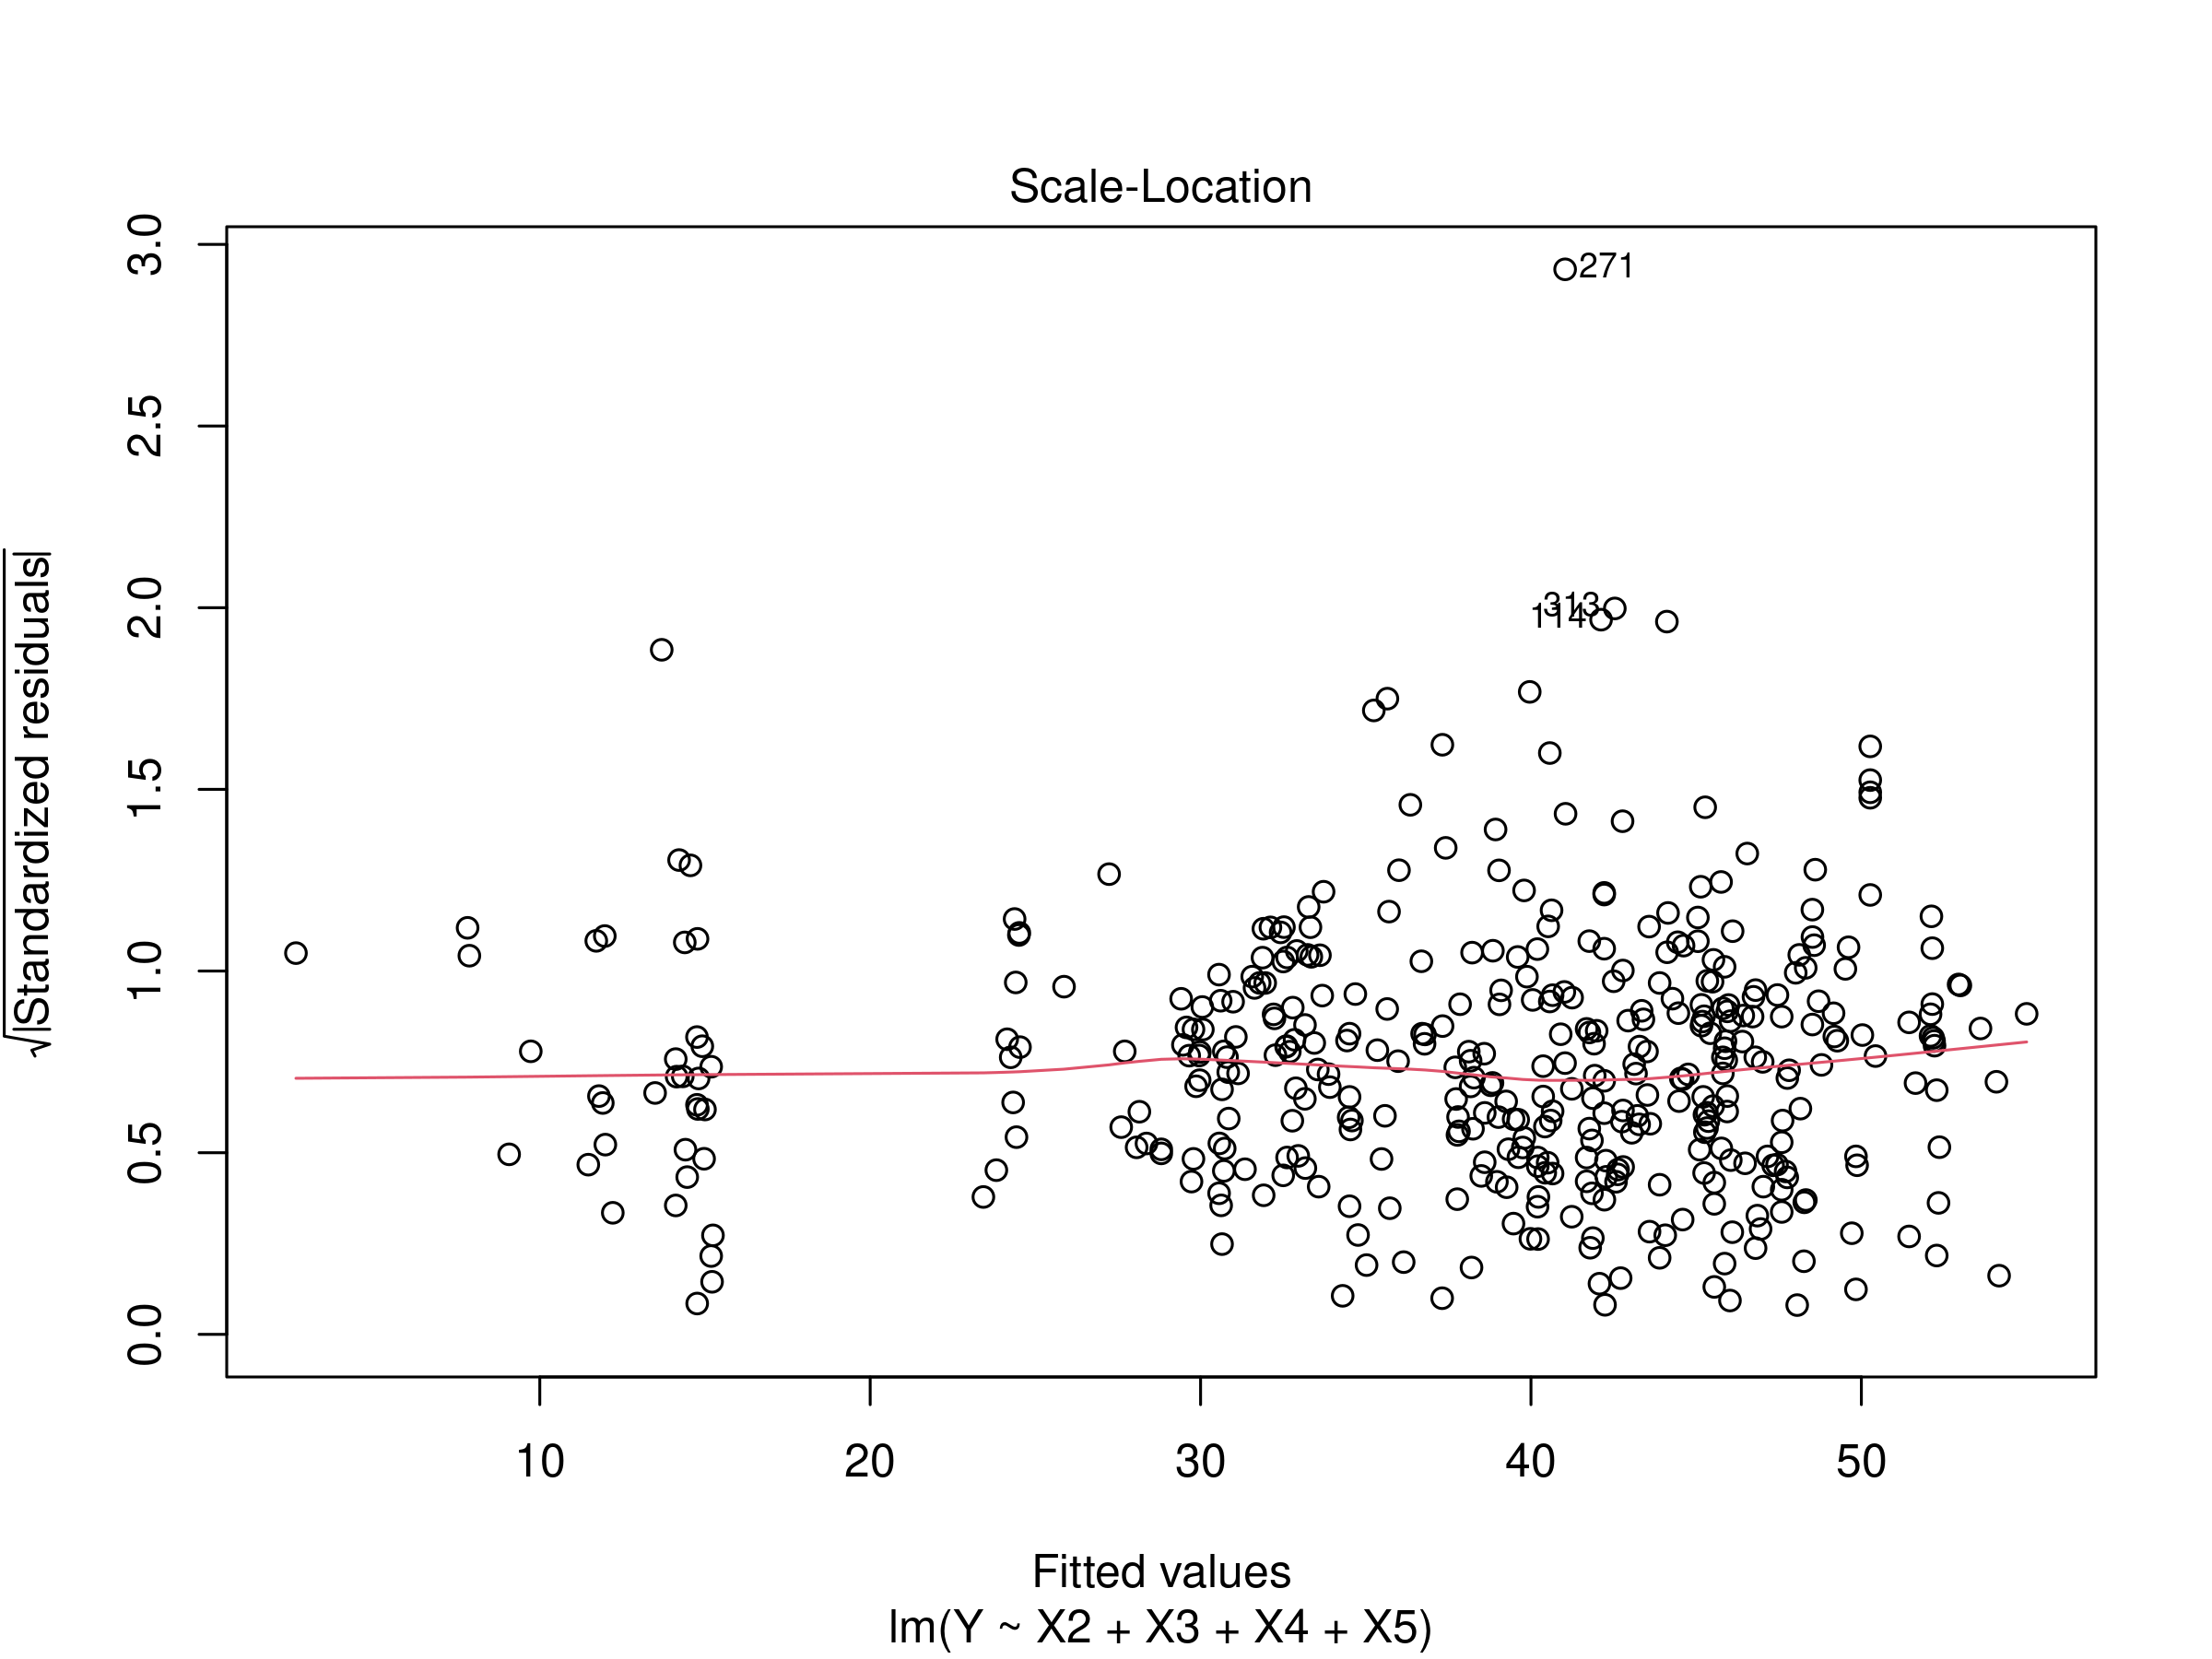

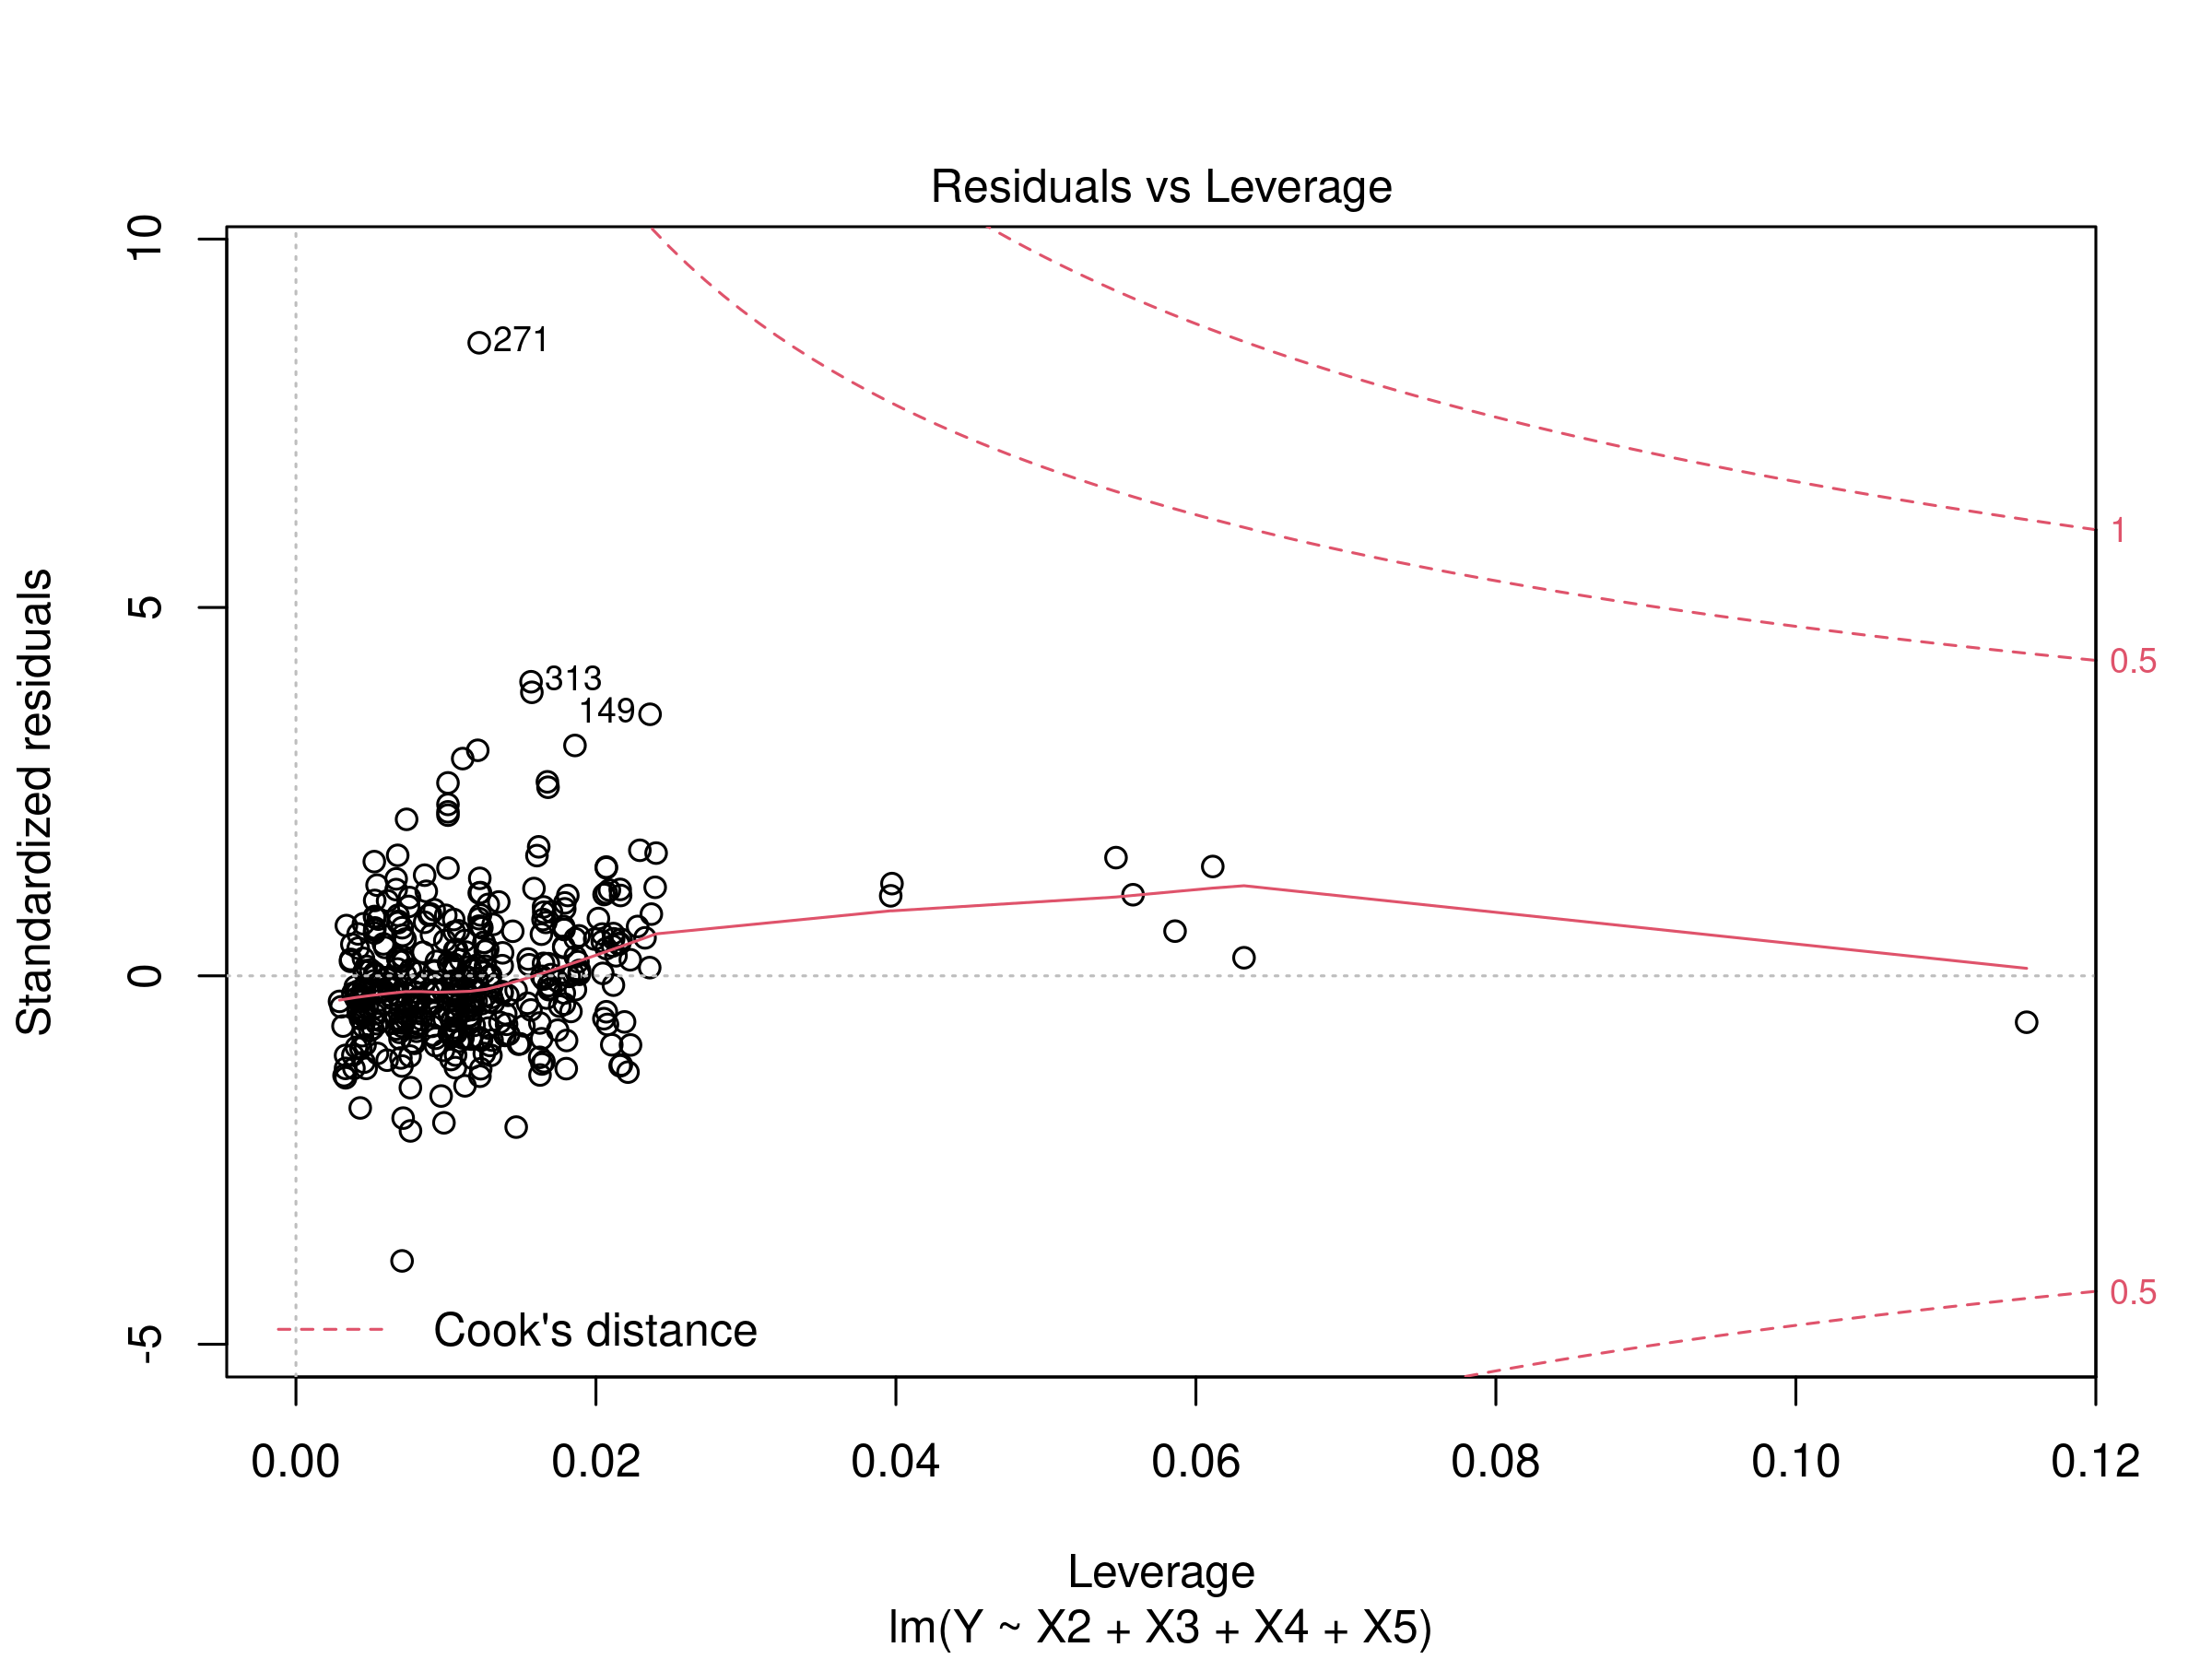

In [32]:
plot(model1)

Model 1

*1번 plot*
- outlier 있지만 등분산에 크게 문제는 없어보인다.
- 게다가 우리는 등분산 검정에서 등분산 가정을 만족한다는 결론을 얻었다.

*2번 plot*
- outlier 의심값들이 존재하지만, 직선에 거의 근접한 모습이다.
- 정규성 검정 결과 정규성 가정을 만족하지 못하지만, 대표본이기 때문에 정규성을 가정하였다.

*3번 plot*
- fitted value와 $\sqrt{표준잔차}$의 plot,
- 등분산을 이루는 것처럼 보인다.

*4번 plot*
- cook 통계량을 크게 가진 값들이 발견되지 않은 것 같다.
- 그래도 271의 주석을 가진 값이 큰 통계량을 가지고 있는 것 같으나 cook 통계량은 1이 넘어가야 문제가 발생하기 때문에 이 데이터는 문제가 되지 않을 것이다.

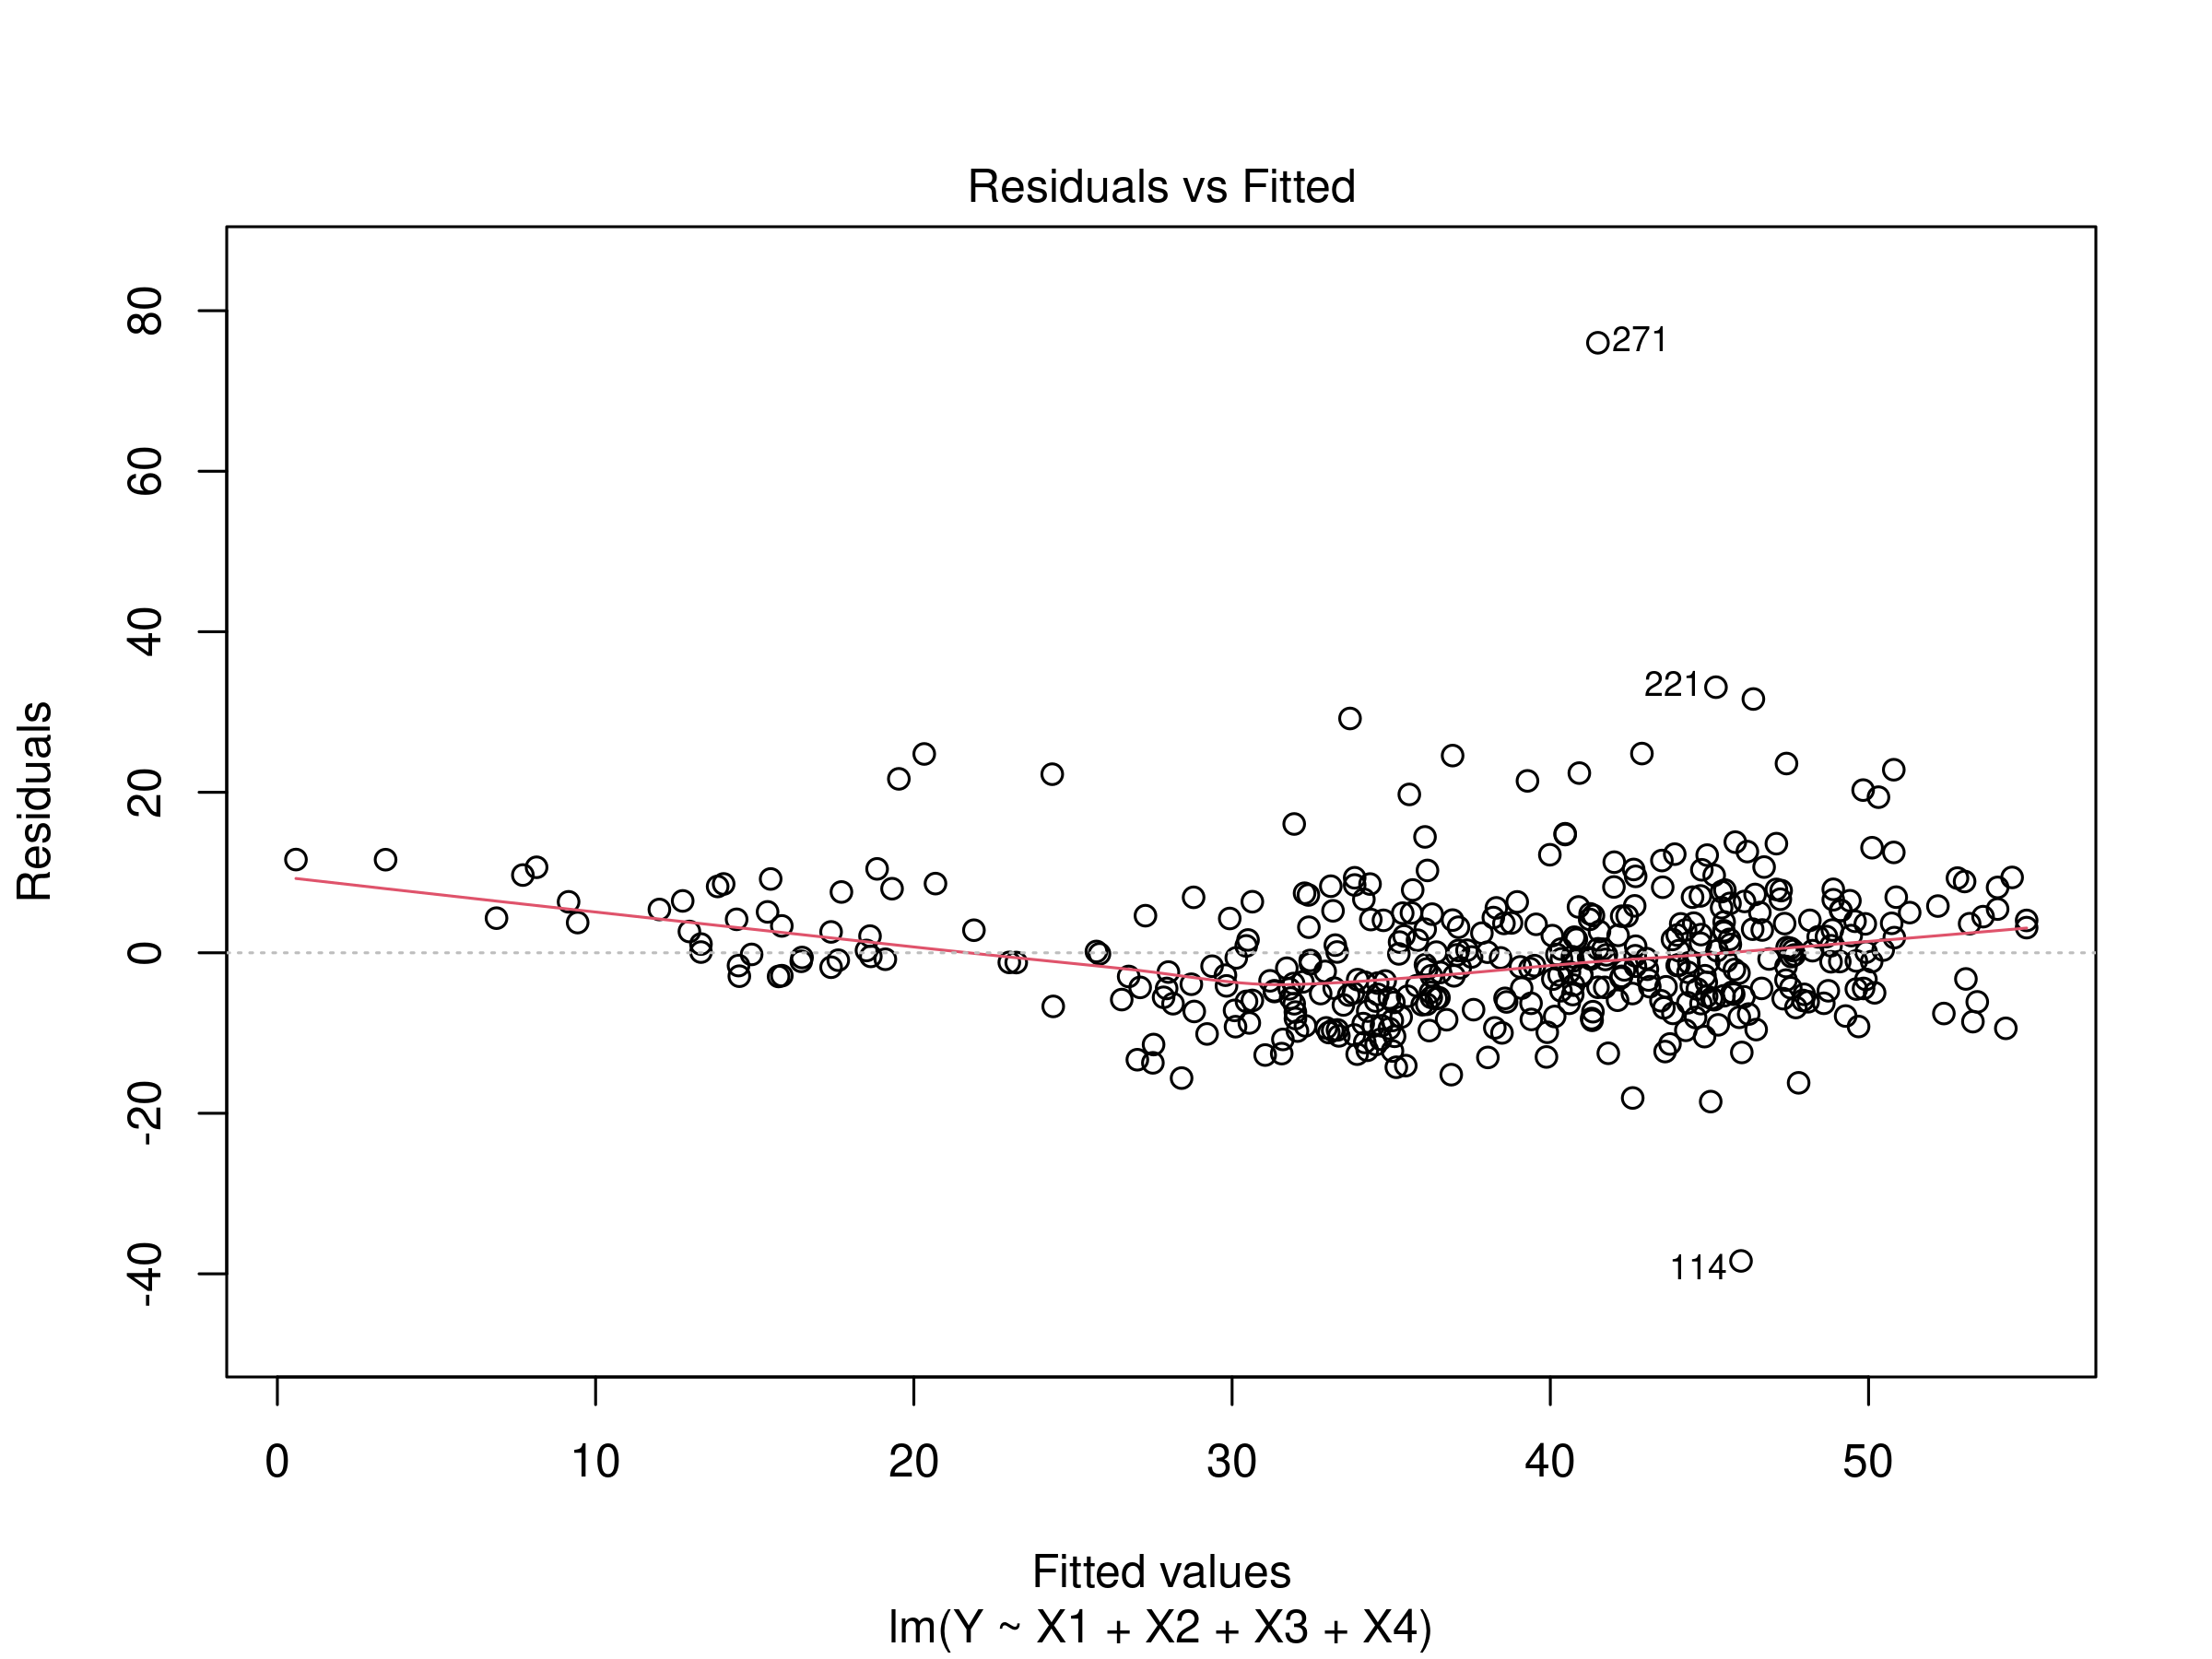

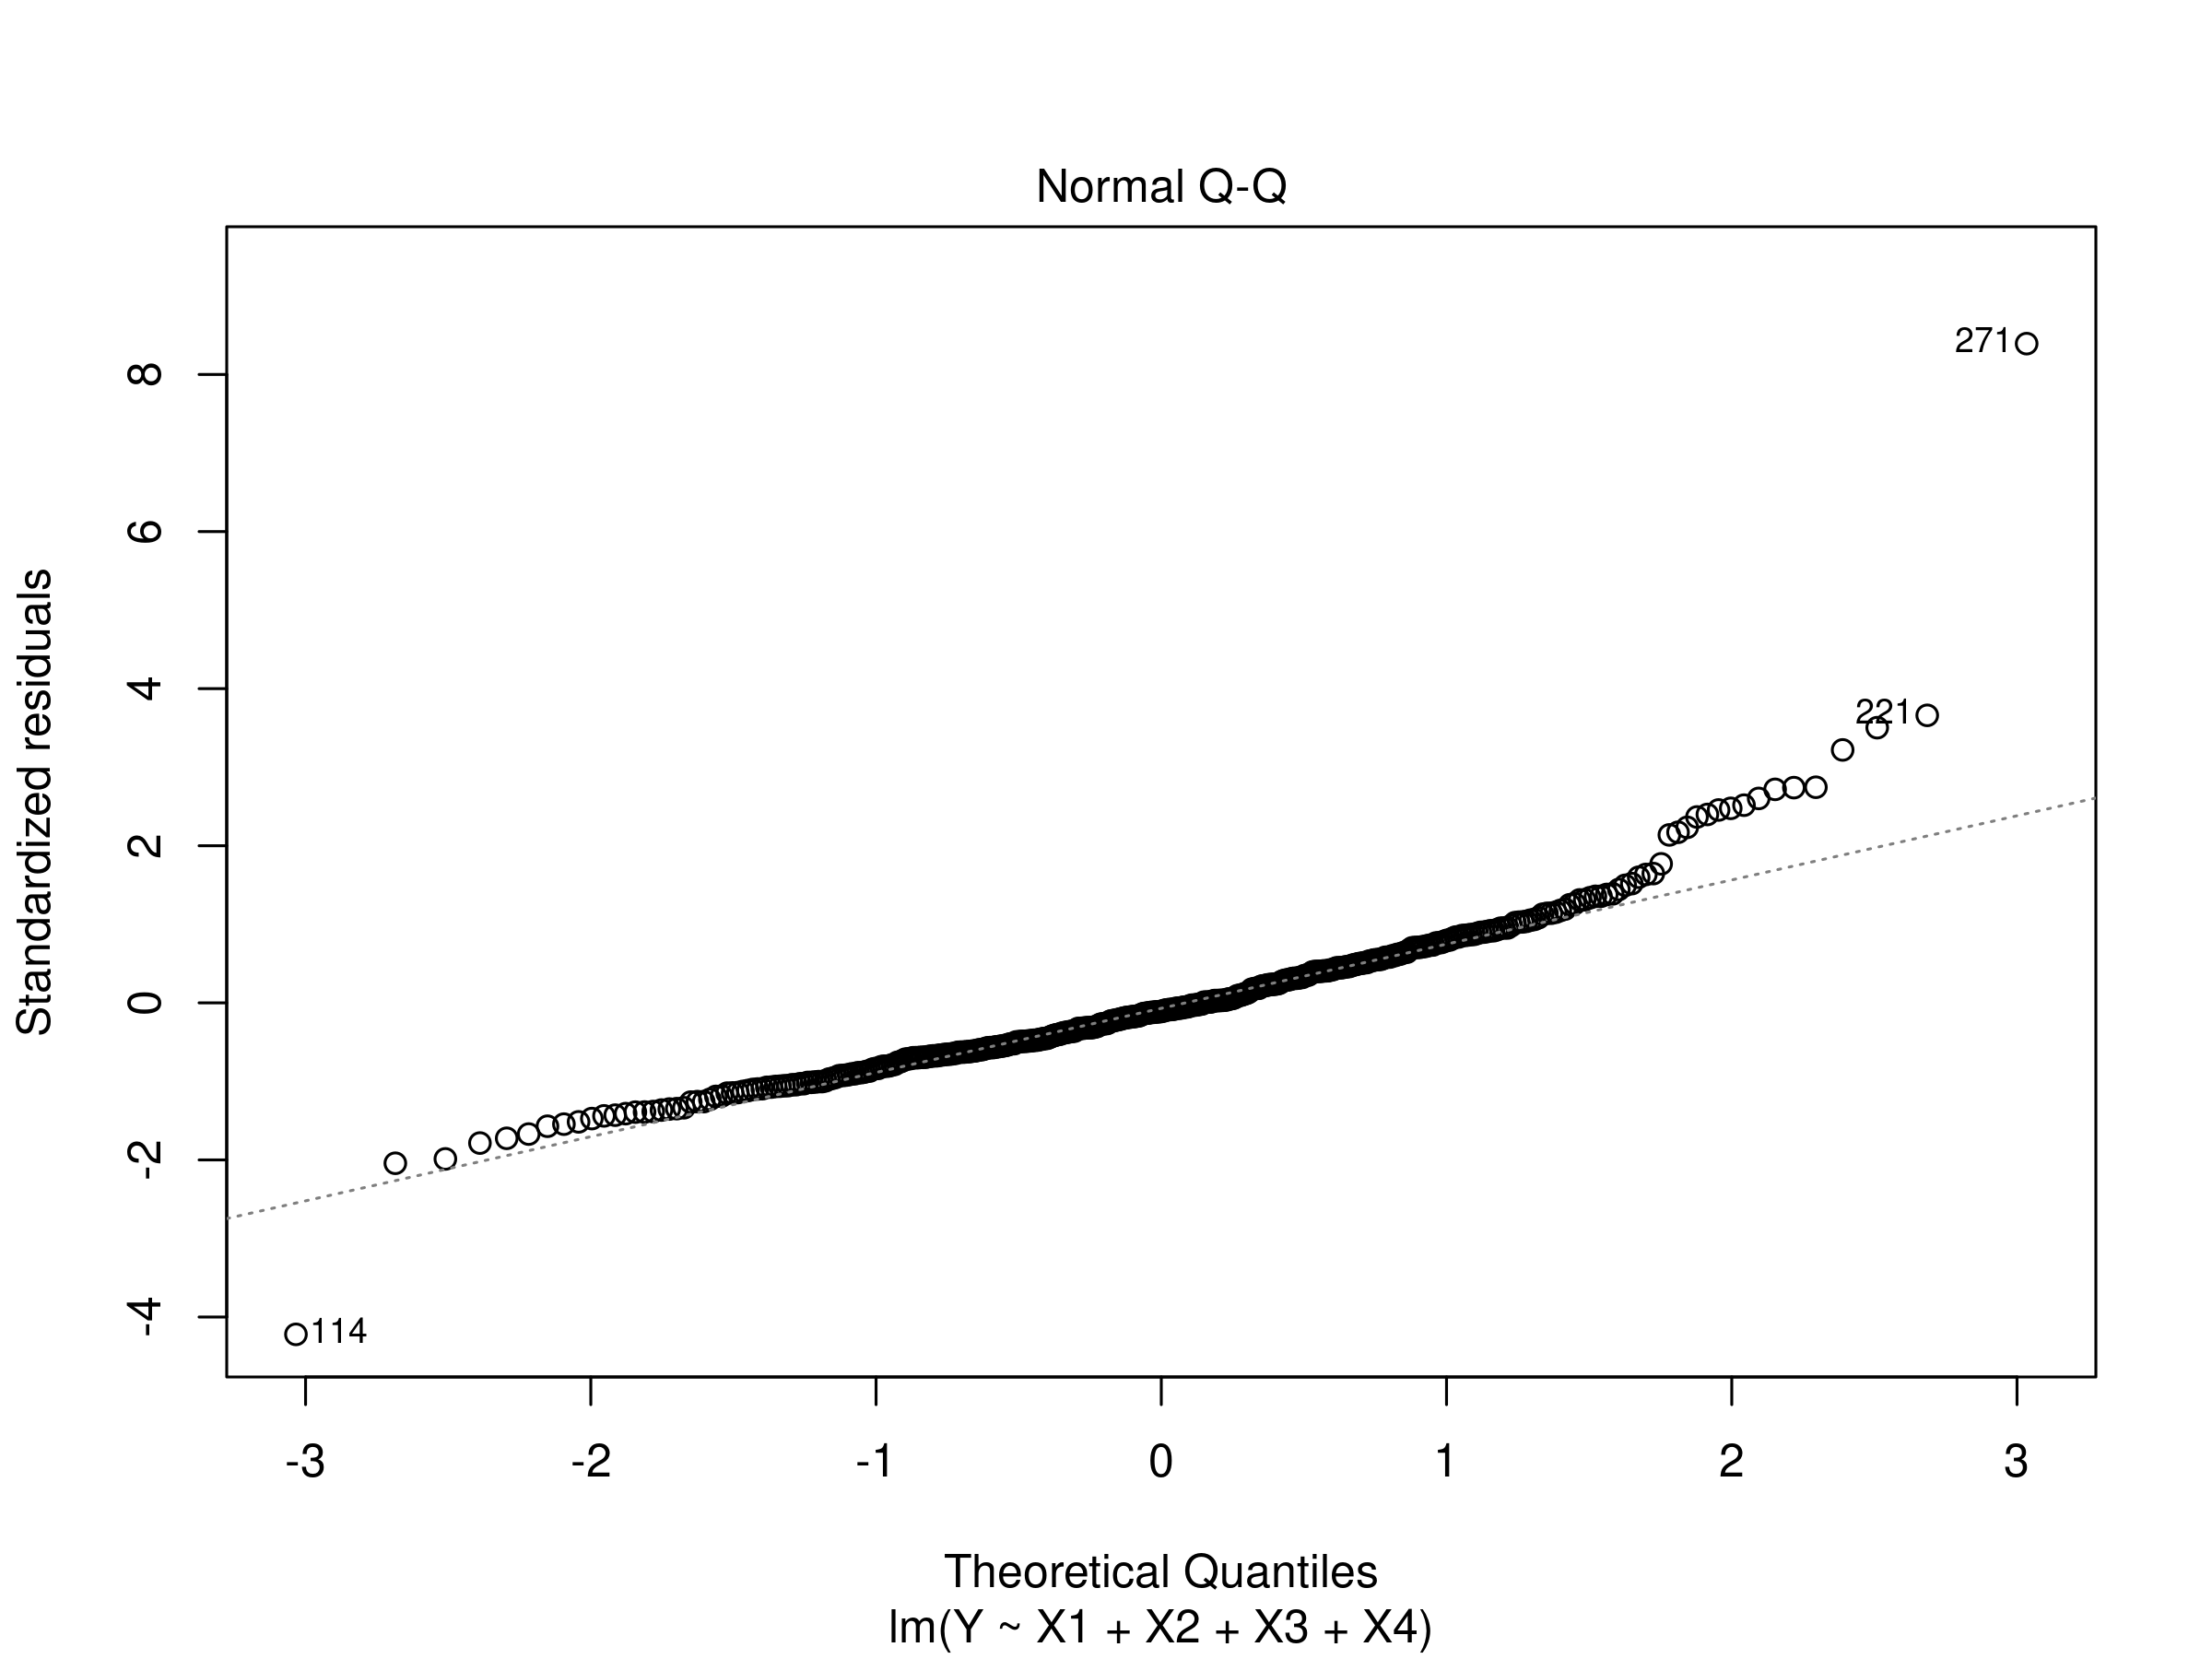

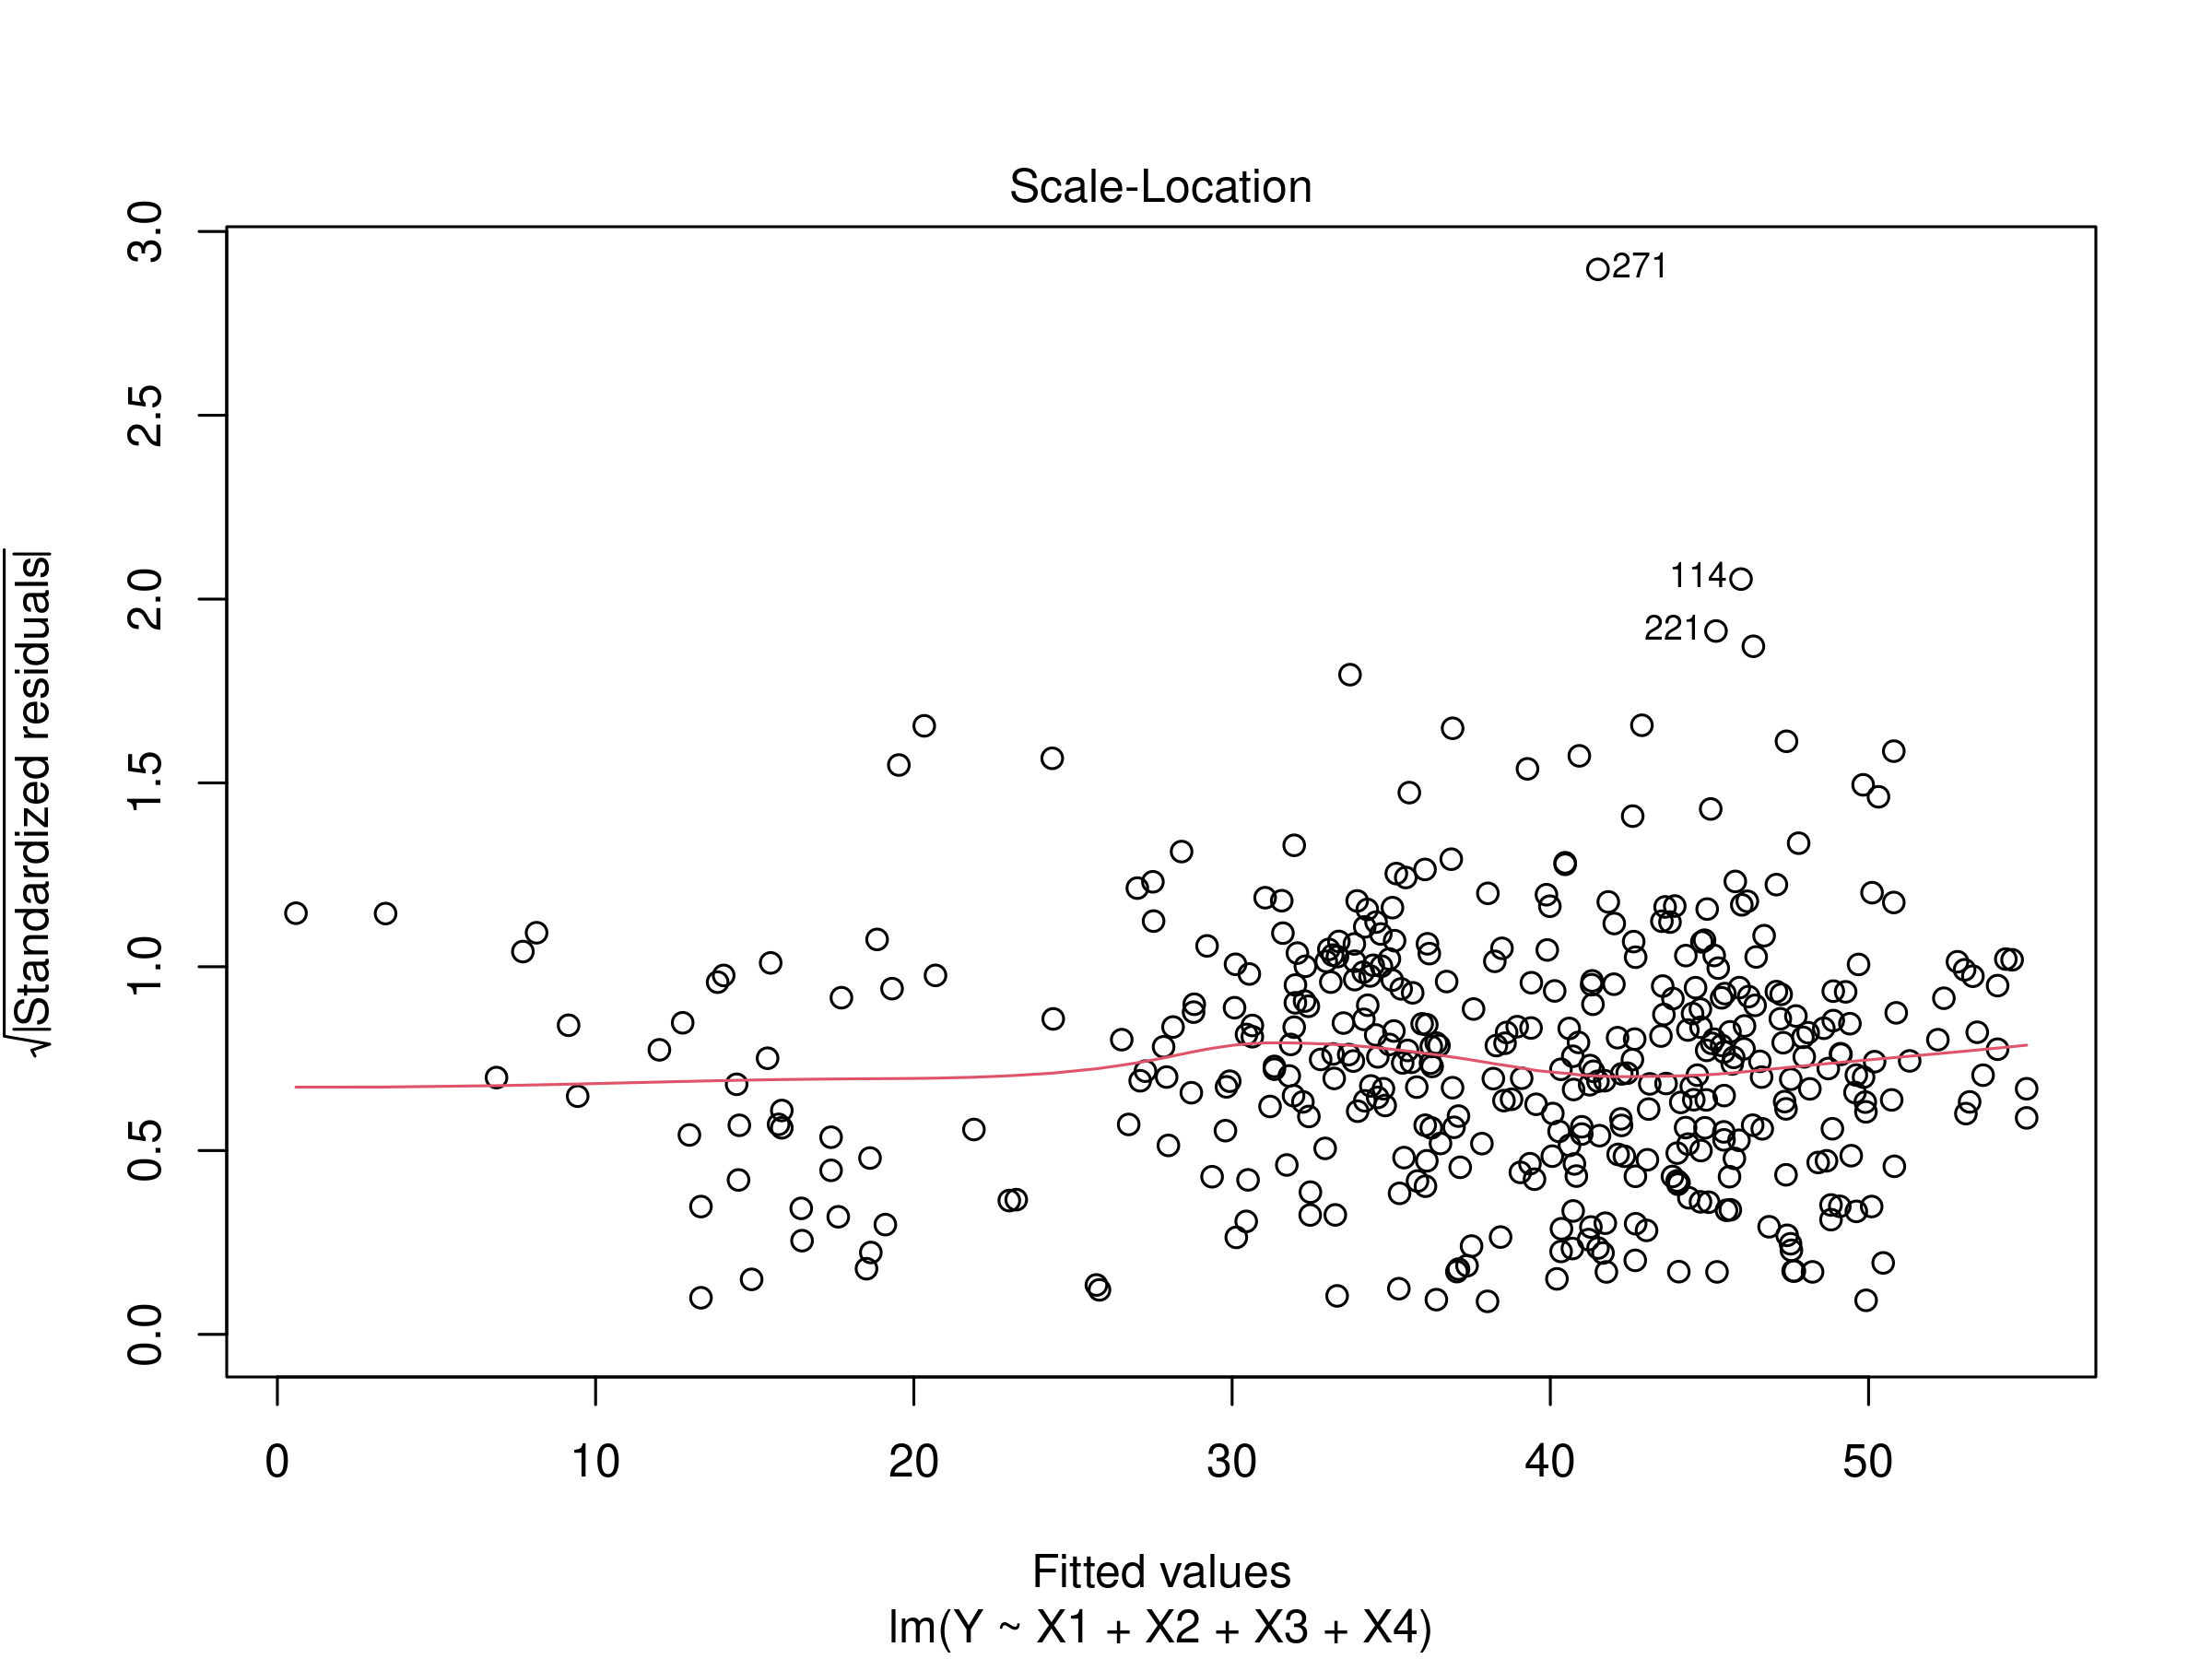

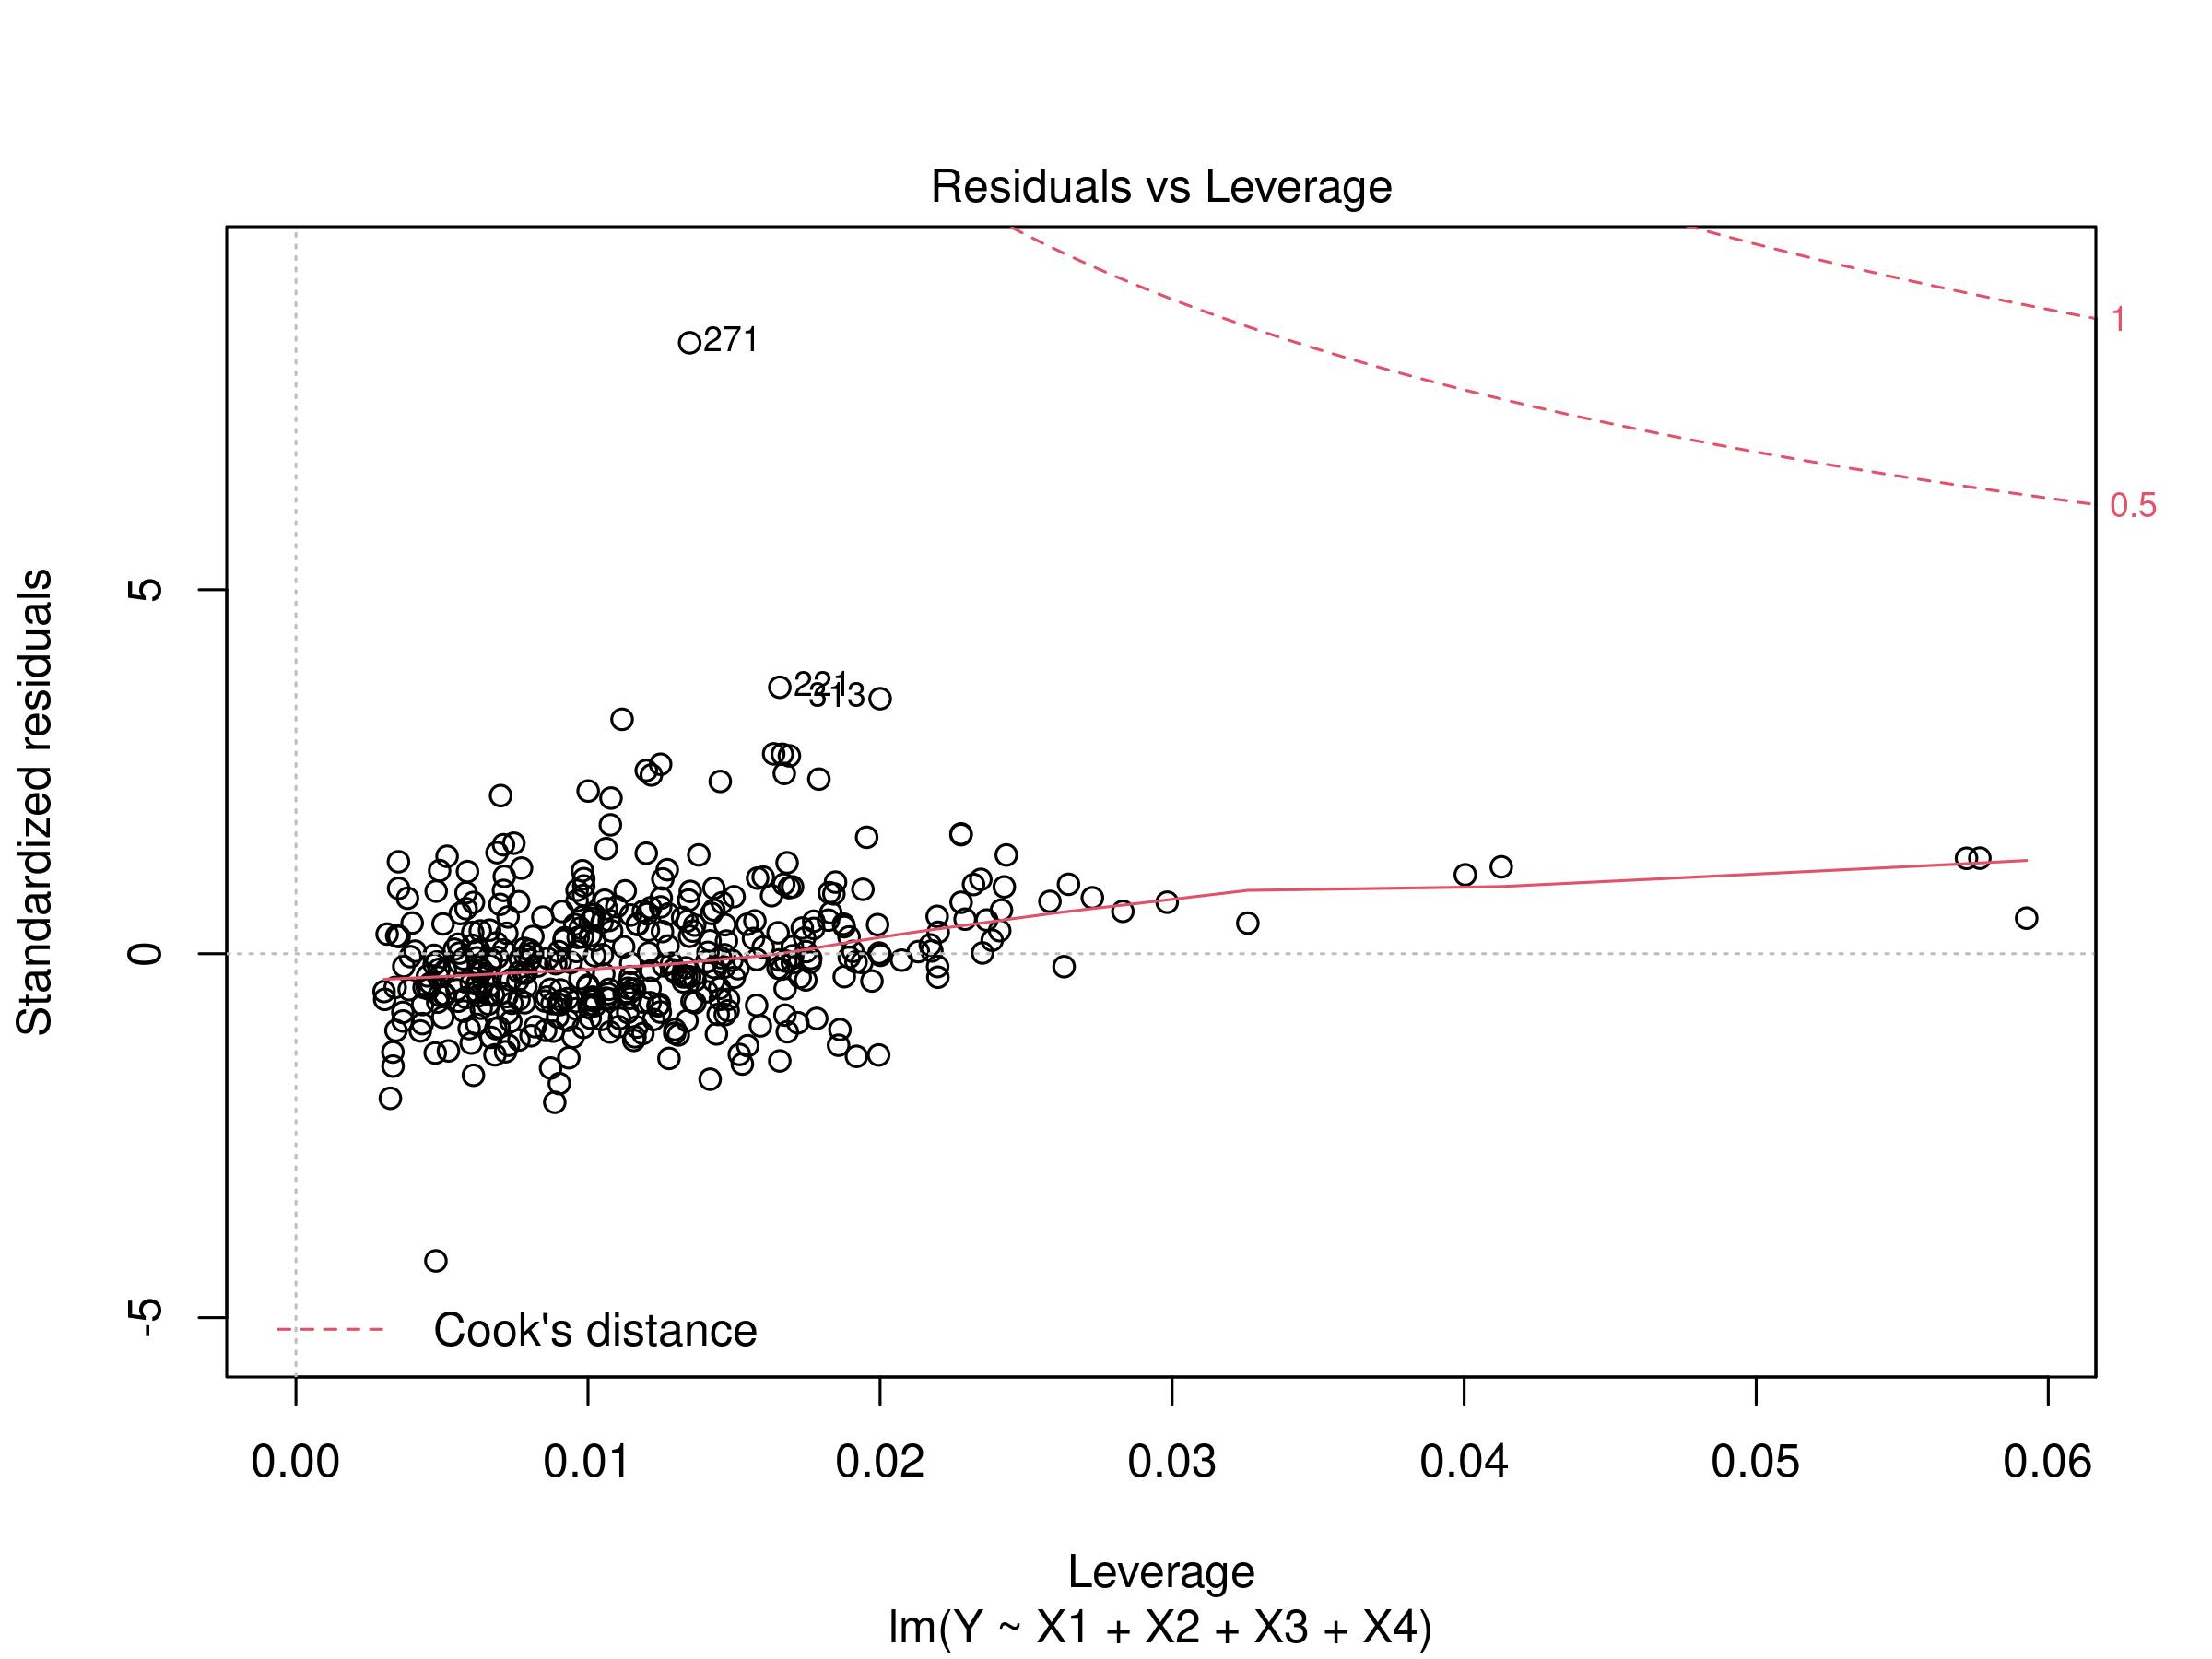

In [33]:
plot(model2)

model 2

*1번 plot*
- outlier 있지만 등분산에 크게 문제는 없어보인다.
- model 2 또한 위의 등분산 검정 결과 등분산 가정을 만족한다는 결론이 도출되었다.

*2번 plot*
- outlier 의심값들이 존재하지만, 직선에 거의 근접한 모습이다.
- model 1과 마찬가지로 대표본이기 때문에 정규성 가정 만족한다고 가정했다.

*3번 plot*
- $\sqrt{표준 잔차}$과 fitted value들의 plot을 보니 안정적이었고, 이분산성이 보이지 않는다.

*4번 plot*
- model 1과 같은 설명,
    - cook 통계량을 크게 가진 값들이 발견되지 않은 것 같다.
    - 그래도 271의 주석을 가진 값이 큰 통계량을 가지고 있는 것 같으나 cook 통계량은 1이 넘어가야 문제가 발생하기 때문에 이 데이터는 문제가 되지 않을 것이다.

## 4. 모형 진단

In [34]:
library(gvlma)

In [35]:
summary(gvlma(x=model1))


Call:
lm(formula = Y ~ X2 + X3 + X4 + X5, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.522  -5.292  -1.579   4.264  76.466 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.916e+03  1.113e+03  -5.317 1.74e-07 ***
X2          -2.687e-01  3.893e-02  -6.903 1.95e-11 ***
X3          -4.175e-03  4.928e-04  -8.473 4.37e-16 ***
X4           1.165e+00  1.897e-01   6.141 1.94e-09 ***
X5           2.386e+02  4.456e+01   5.355 1.43e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.954 on 409 degrees of freedom
Multiple R-squared:  0.5711,	Adjusted R-squared:  0.5669 
F-statistic: 136.2 on 4 and 409 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = model1) 

                      Value   p-value                   Decision
Global Stat        3831.224 0.000e+00 Assumptions NO

$Y_{model 1} =-5.916 -2.687X_2 -4.175X_3 +  1.165X_4 +  2.386X_5$

model 1 에서 intercept와 각 변수들(X2,X3,X4,X5)의 p-value를 보니 모든 설명변수가 유의한 값을 띄어 영향을 끼친다는 결론이 도출되었다.

In [36]:
summary(gvlma(x=model2))


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.392  -5.630  -0.985   4.304  76.004 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.159e+04  3.214e+03  -3.607 0.000348 ***
X1           5.780e+00  1.597e+00   3.620 0.000331 ***
X2          -2.545e-01  3.953e-02  -6.438 3.40e-10 ***
X3          -5.513e-03  4.480e-04 -12.305  < 2e-16 ***
X4           1.258e+00  1.918e-01   6.559 1.64e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.118 on 409 degrees of freedom
Multiple R-squared:  0.5553,	Adjusted R-squared:  0.551 
F-statistic: 127.7 on 4 and 409 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = model2) 

                      Value   p-value                   Decision
Global Stat        3024.561 0.000e+00 Assumptions NOT

$Y_{model 2} = 42.977286 -0.2528X_2   -0.0053X_3 +   1.297X_4$

model 2 에서 intercept와 각 변수들(X1,X2,X3,X4)의 p-value를 보니 모든 설명변수가 유의한 값을 띄어 영향을 끼친다는 결론이 도출되었다.

**등분산성 가정** : 두 모델 모두 만족

**정규성 가정** : 정규성 가정을 위배하지만 대표본이기 때문에 정규성 가정을 다른다. 두 모델 모두 정규성을 가정하였다.

**독립성 가정** : 더빈왓슨 검정을 통해 두 모형 모두 독립성 가정을 만족한다는 것을 위에서 밝힌 바 있다.

또한 두 모델 모두 p값이(`p-value: < 2.2e-16`) 유의하여 모델이 의미있다는 결론이 도출되었다.

model 1 F-statistic: `136.2`

model 2 F-statistic: `161.1` 

F값(SSR/SSE)만 비교해보면 model 2의 값이 더 커서 model 2의 SSR이 더 크다는 결론이 나왔다.

하지만 model 1 의 설명력이 더 컸다.`0.5669(model 1)>  0.5377 (model 2)`

따라서 model 1을 최종 모델로 선택할 것이다.

$Y_{model 1} =-5.916 -2.687X_2 -4.175X_3 +  1.165X_4 +  2.386X_5$

선택한 model 1 해석
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)
- X2=the house age (unit: year)
    - house age 영향은(X2) -2.687로 house age가 1 year씩 증가할수록 집값(Y)은 2.687만큼 감소한다.
- X3=the distance to the nearest MRT station (unit: meter)
    - 가장 가까운 MRT 역과의 거리의 영향(X3)은 -4.175로 이 거리가 1 meter씩 증가할수록 집값(Y)은 4.175만큼 감소한다.
- X4=the number of convenience stores in the living circle on foot (integer)
    - 걸어서 갈 수 있는 편의시설의 수의 영향(X4)은 1.165로, 편의시설 수가 주변에 1개씩 증가할 수록 집값(Y)도 1.165만큼 증가한다.
- X5=the geographic coordinate, latitude. (unit: degree)
    - 위도의 영향(X5)은 2.386으로, 위도가 1 degree씩 증가할수록 Y은 2.386만큼 증가한다.

## 5. Bootstraping

각 회귀계수에 대한 95% 신뢰구간을 Bootstrap에 근거하여 구성하고 이를 이론적인 결과에 의해 산출되는 신뢰구간과 비교한 후 비슷하게 도출되는지 확인할 것. 비슷하다면 왜인지, 차이가 있다면 어떤 이유로 판단되는지 등을 기술

In [37]:
B=2000
set.seed(1)
n = length(df$Y)
Bm1=c()

for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx2=df$X2[hi]
  hx3=df$X3[hi]
  hx4=df$X4[hi]
  hx5=df$X5[hi]
  hy=df$Y[hi]
  Bm1[i]=lm(hy~hx2+hx3+hx4+hx5)$coefficients[2]
}

hb=model1$coefficients[2]

# Bootstrap C.I. (normal interval)
c(hb-qnorm(0.975)*sd(Bm1),hb+qnorm(0.975)*sd(Bm1))
print("model 1")

X2         X2 
-0.3541072 -0.1833311

[1] "model 1"


$\hat{\beta}_1 \pm Z_{0.025} se(\hat{\beta}_1)^*$

0을 포함하지 않았다. 즉, 각 설명변수들이 유의미한 영향을 띄고 있다는 것을 뜻한다.

In [38]:
confint(model1)

2.5 %         97.5 %       
(Intercept) -8.103394e+03 -3.728619e+03
X2          -3.452457e-01 -1.921926e-01
X3          -5.143732e-03 -3.206428e-03
X4           7.919304e-01  1.537632e+00
X5           1.510388e+02  3.262326e+02

In [39]:
cat("by central limit theorem or normality assumption:",c(mean(df$Y)-qnorm(0.975)*sd(df$Y)/sqrt(length(df$Y)),mean(df$Y)+qnorm(0.975)*sd(df$Y)/sqrt(length(df$Y))))
cat("\nby Bootstrap (normal interval): ",c(mean(df$Y)-qnorm(0.975)*sqrt(var(Bm1)),mean(df$Y)+qnorm(0.975)*sqrt(var(Bm1))))

by central limit theorem or normality assumption: 36.66952 39.29087
by Bootstrap (normal interval):  37.89481 38.06558

각 회귀계수에 대해 95% 신뢰구간을 Bootstrap에 근거하여 구성해보니 이론적인 결과와 비슷한 범위로 도출된 것, 혹은 이론적인 범위 안에서 신뢰구간이 형성된 것을 확인할 수 있었다.
- 비슷한 이유로는 추정량의 분포가 대표본 이론에 따라 정규분포라고 가정하고 있었기 때문에 이론적인 신뢰구간의 범위를 따라간 것을 들 수 있겠다.
- 선택한 모형은 정규성가정을 만족하지 않았지만 정규분포라고 가정한 바 있다. $\to$ bootstrap을 이용해 절차적 정당성을 확보했다.